# Spaceship Titanic

Welcome to the year 2912, where our skills as data scientists are required to solve a cosmic mystery. We have received a transmission from 4 light years away and things are not looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With nearly 13,000 passengers on board, the ship set out on its maiden voyage, transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While circling Alpha Centauri en route to its first destination, the scorching 55 Cancri E, the unsuspecting Titanic spacecraft collided with a space-time anomaly hidden within a dust cloud. Unfortunately, it met a similar fate to its namesake 1000 years prior. Although the ship remained intact, almost half of the passengers were transported to an alternate dimension!

> **Objective**: Our task is to predict whether a passenger was transported to an alternate dimension during the Titanic spacecraft collision with the space-time anomaly. To help make these predictions, we are provided with a set of personal records retrieved from the ship's damaged computer system.


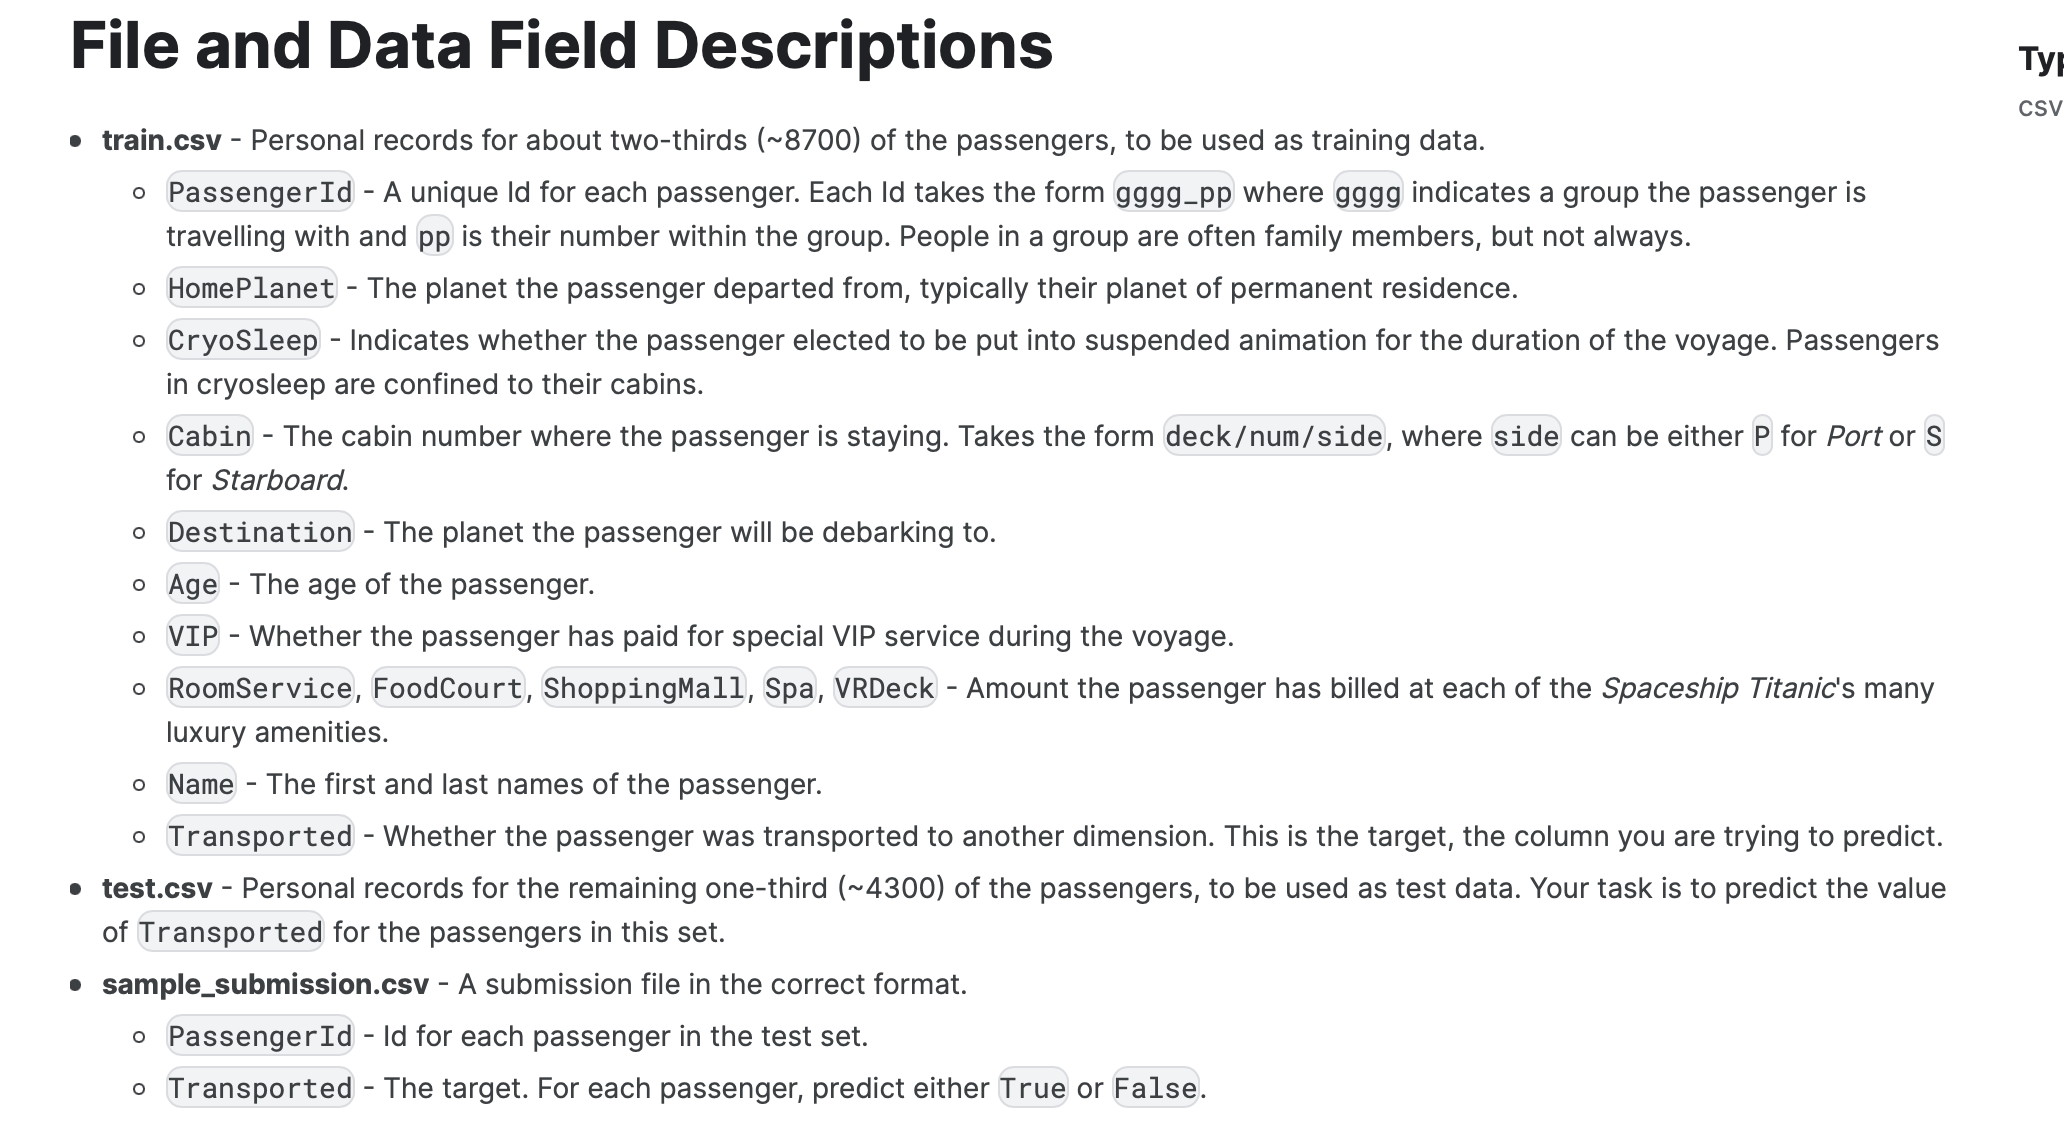

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Importing Dataset

In [3]:
''' load data '''
# Load training data
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
# Load test data
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
# Display the first 5 rows of the training dataset to inspect the data
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [5]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [6]:
# values of the target
train.Transported.value_counts() # balanced

True     4378
False    4315
Name: Transported, dtype: int64

In [7]:
# Display the data types of each column in the train dataframe
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Exploratory Data Analysis

In [8]:
''' shape of the data '''
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (8693, 14)
test shape: (4277, 13)


In [9]:
''' missing values train '''
# calculate the number of missings and the %
pd.DataFrame([train.isna().sum(),train.isna().sum()*100/len(train.Transported)],index = ['number of missings','% missings']).T

number of missings  % missings
PassengerId                  0.0    0.000000
HomePlanet                 201.0    2.312205
CryoSleep                  217.0    2.496261
Cabin                      199.0    2.289198
Destination                182.0    2.093639
Age                        179.0    2.059128
VIP                        203.0    2.335212
RoomService                181.0    2.082135
FoodCourt                  183.0    2.105142
ShoppingMall               208.0    2.392730
Spa                        183.0    2.105142
VRDeck                     188.0    2.162660
Name                       200.0    2.300702
Transported                  0.0    0.000000

In [10]:
''' missing values test '''
pd.DataFrame([test.isna().sum(),test.isna().sum()*100/len(test.VIP)],index = ['number of missings','% missings']).T

number of missings  % missings
PassengerId                  0.0    0.000000
HomePlanet                  87.0    2.034136
CryoSleep                   93.0    2.174421
Cabin                      100.0    2.338087
Destination                 92.0    2.151040
Age                         91.0    2.127660
VIP                         93.0    2.174421
RoomService                 82.0    1.917232
FoodCourt                  106.0    2.478373
ShoppingMall                98.0    2.291326
Spa                        101.0    2.361468
VRDeck                      80.0    1.870470
Name                        94.0    2.197802

In [11]:
''' duplicated values '''
print(f'duplicated values in train: {train.duplicated().sum()}')
print(f'duplicated values in test: {test.duplicated().sum()}')

duplicated values in train: 0
duplicated values in test: 0


## Data Transformation

We are going to fill in some missing values by establishing relationships between variables. First, we create a new variable that relates to the expenses of all the services during the stay on the boat.

In [12]:
train_test=pd.concat([train, test])

1) CryoSleep
If  ```CryoSleep = 1```,  the passenger will be cryogenized and therefore will not have spent money on other services offered during the trip. Let's fill in missing cost with "0" if a passenger was in CryoSleep.

In [13]:
''' Expenses '''
Expenses = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_test.loc[:,Expenses]=train_test.apply(lambda x: 0 if x.CryoSleep == True else x,axis =1)

2)  CryoSleep + Expenses
From the description of the contest guidelines we can conclude that if a person is in cryosleep, he cannot spend money to buy additional services. Moreover, when filling in the missing information in the columns: `Age`,`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`, we should remember this same feature of `Cryosleep`. Let's fill in the missing information based on this conclusion.

In [14]:
# create column Expenses
train_test['Expenses'] = train_test.loc[:,Expenses].sum(axis=1)
# if the passenger has no expenses and Cryosleep is NaN set Cryosleep to True
train_test.loc[:,['CryoSleep']]=train_test.apply(lambda x: True if x.Expenses == 0
                                                 and pd.isna(x.CryoSleep) else x,axis =1)

3) PassengerId
As mentioned in the data description, the variable ```PassengerId``` has the form ```gggg_pp```, where ```gggg``` indicates the group that the passenger is traveling with and ```pp``` is the number within the group itself. People who belong to a group are usually family, although not always.

In [15]:
train_test.loc[:,['Room']] = train_test.PassengerId.apply(lambda x: x[0:4] )

In [16]:
# we must drop the duplicated values
train_test.duplicated('Room').sum()

3690

In [17]:
# create variables to help us fill missing values
guide_VIP=train_test.loc[:,['Room','VIP']].dropna().drop_duplicates('Room')
guide_Cabin=train_test.loc[:,['Room','Cabin']].dropna().drop_duplicates('Room')
guide_HomePlanet=train_test.loc[:,['Room','HomePlanet']].dropna().drop_duplicates('Room')
guide_Destination=train_test.loc[:,['Room','Destination']].dropna().drop_duplicates('Room')
train_test=pd.merge(train_test,guide_Cabin,how="left",on='Room',suffixes=('','_y'))
train_test=pd.merge(train_test,guide_VIP,how="left",on='Room',suffixes=('','_y'))
train_test=pd.merge(train_test,guide_HomePlanet,how="left",on='Room',suffixes=('','_y'))
train_test=pd.merge(train_test,guide_Destination,how="left",on='Room',suffixes=('','_y'))

In [18]:
train_test.loc[:,['VIP']]=train_test.apply(lambda x: x.VIP_y if pd.isna(x.VIP) else x,axis=1)
train_test.loc[:,['Cabin']]=train_test.apply(lambda x:  x.Cabin_y if pd.isna(x.Cabin) else x,axis=1)
train_test.loc[:,['HomePlanet']]=train_test.apply(lambda x:  x.HomePlanet_y if pd.isna(x.HomePlanet) else x,axis=1)
train_test.loc[:,['Destination']]=train_test.apply(lambda x:  x.Destination_y if pd.isna(x.Destination) else x,axis=1)

4) HomePlanet + Destination
Let´s see relations between `HomePlanet` and `Destination`.

In [19]:
analys = train_test.loc[:,['HomePlanet','Destination']]
analys['numeric'] =1
analys.groupby(['Destination','HomePlanet']).count()

numeric
Destination   HomePlanet         
55 Cancri e   Earth           995
              Europa         1343
              Mars            299
PSO J318.5-22 Earth          1083
              Europa           29
              Mars             68
TRAPPIST-1e   Earth          4737
              Europa         1780
              Mars           2328

5) Split Cabin
Let's split the column and drop usless columns.

In [20]:
train_test[["Deck", "Cabin_num", "Side"]] = train_test["Cabin"].str.split("/", expand=True)

6) Split Name

In [21]:
train_test["FirstName"] = train_test["Name"].str.split("/", expand=True).iloc[:,0]
train_test.loc[:,['SecondName']] = train_test.Name.str.split(" ",expand=True).iloc[:,1]
train_test['Name_key']=train_test['SecondName']+train_test['Room']

## Numeric Data Exploration

In [22]:
''' distribution of the numeric variables '''
# Call the describe method on the train dataset to get a summary of its numerical variables.
# The T method transposes the output to display the summary statistics horizontally instead of vertically.
train_test.describe().T

count         mean          std  min   25%    50%     75%  \
Age           12700.0    28.771969    14.387261  0.0  19.0   27.0    38.0   
RoomService   12800.0   221.278359   645.517250  0.0   0.0    0.0    47.0   
FoodCourt     12790.0   448.109930  1578.151525  0.0   0.0    0.0    72.0   
ShoppingMall  12795.0   173.115279   587.791279  0.0   0.0    0.0    26.0   
Spa           12793.0   305.896819  1125.893121  0.0   0.0    0.0    54.0   
VRDeck        12793.0   304.607207  1176.174871  0.0   0.0    0.0    40.0   
Expenses      12970.0  1433.221049  2807.369708  0.0   0.0  716.0  1442.0   

                  max  
Age              79.0  
RoomService   14327.0  
FoodCourt     29813.0  
ShoppingMall  23492.0  
Spa           22408.0  
VRDeck        24133.0  
Expenses      35987.0

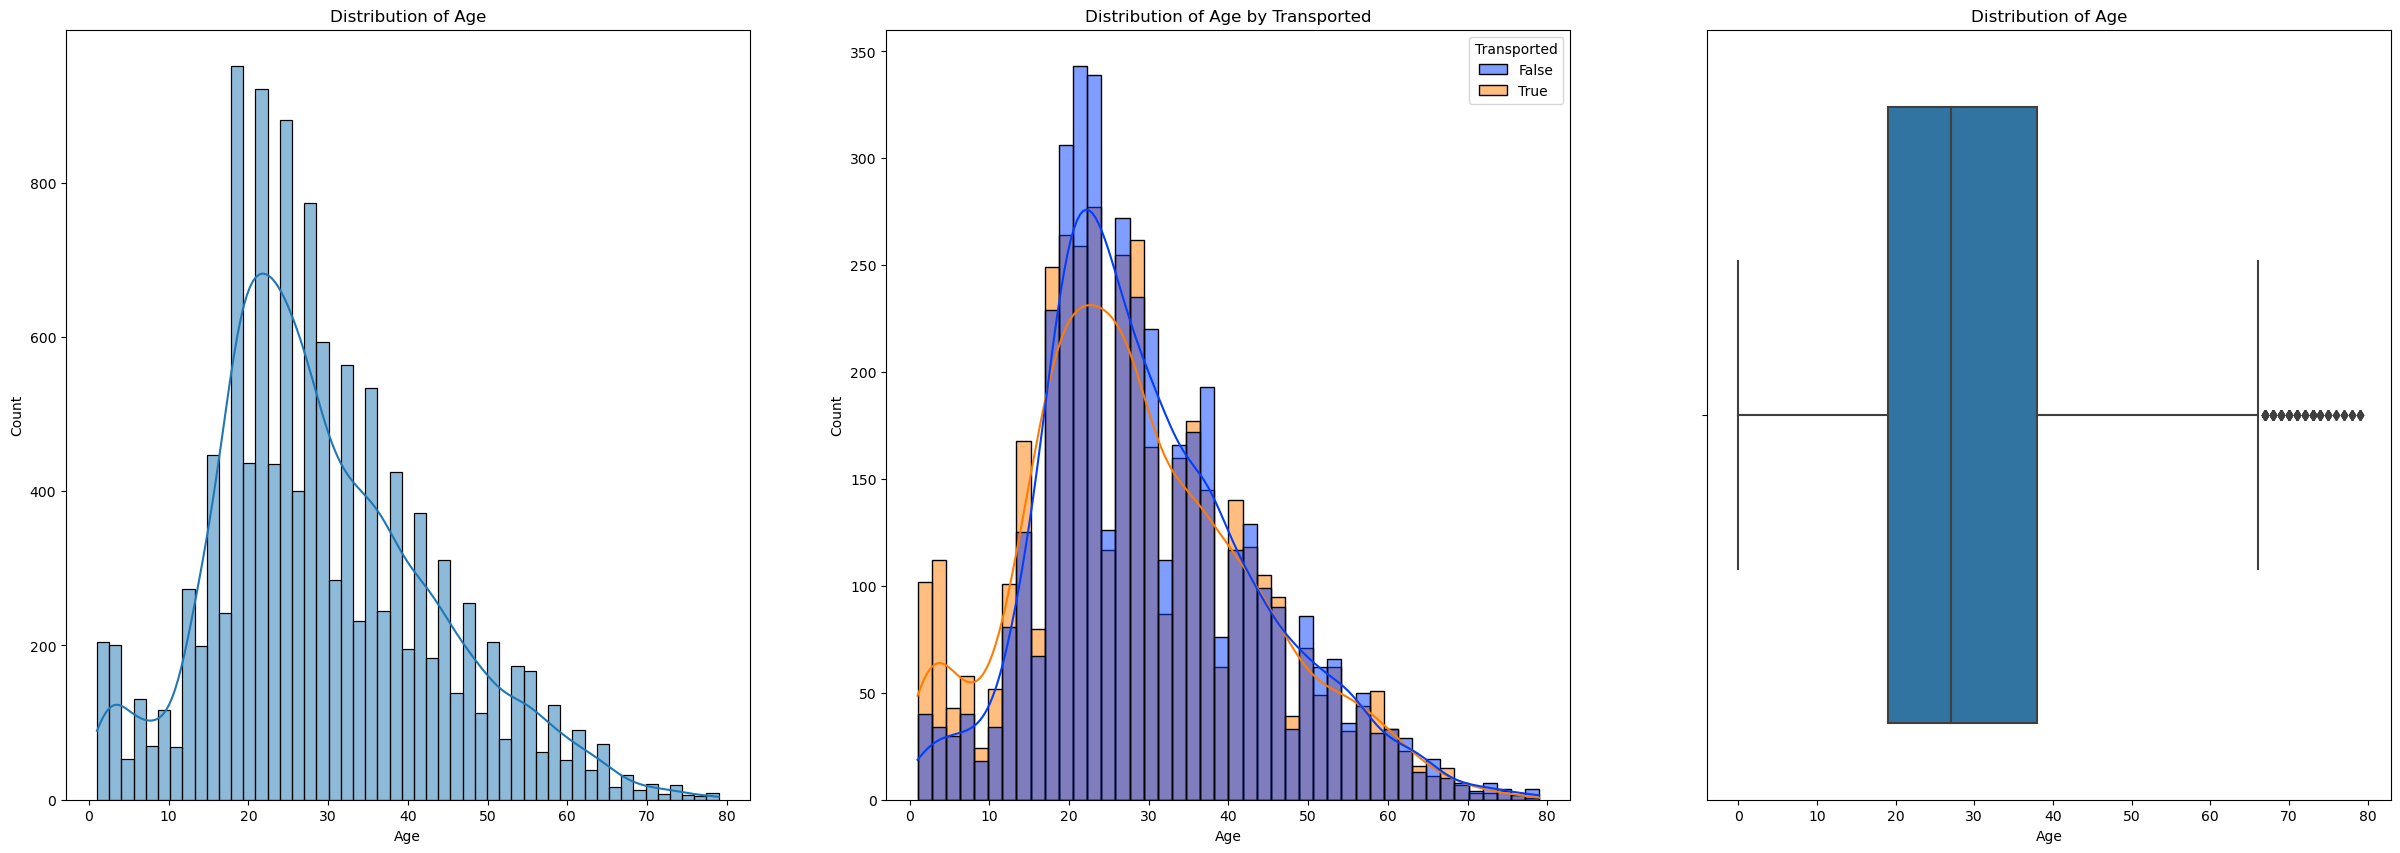

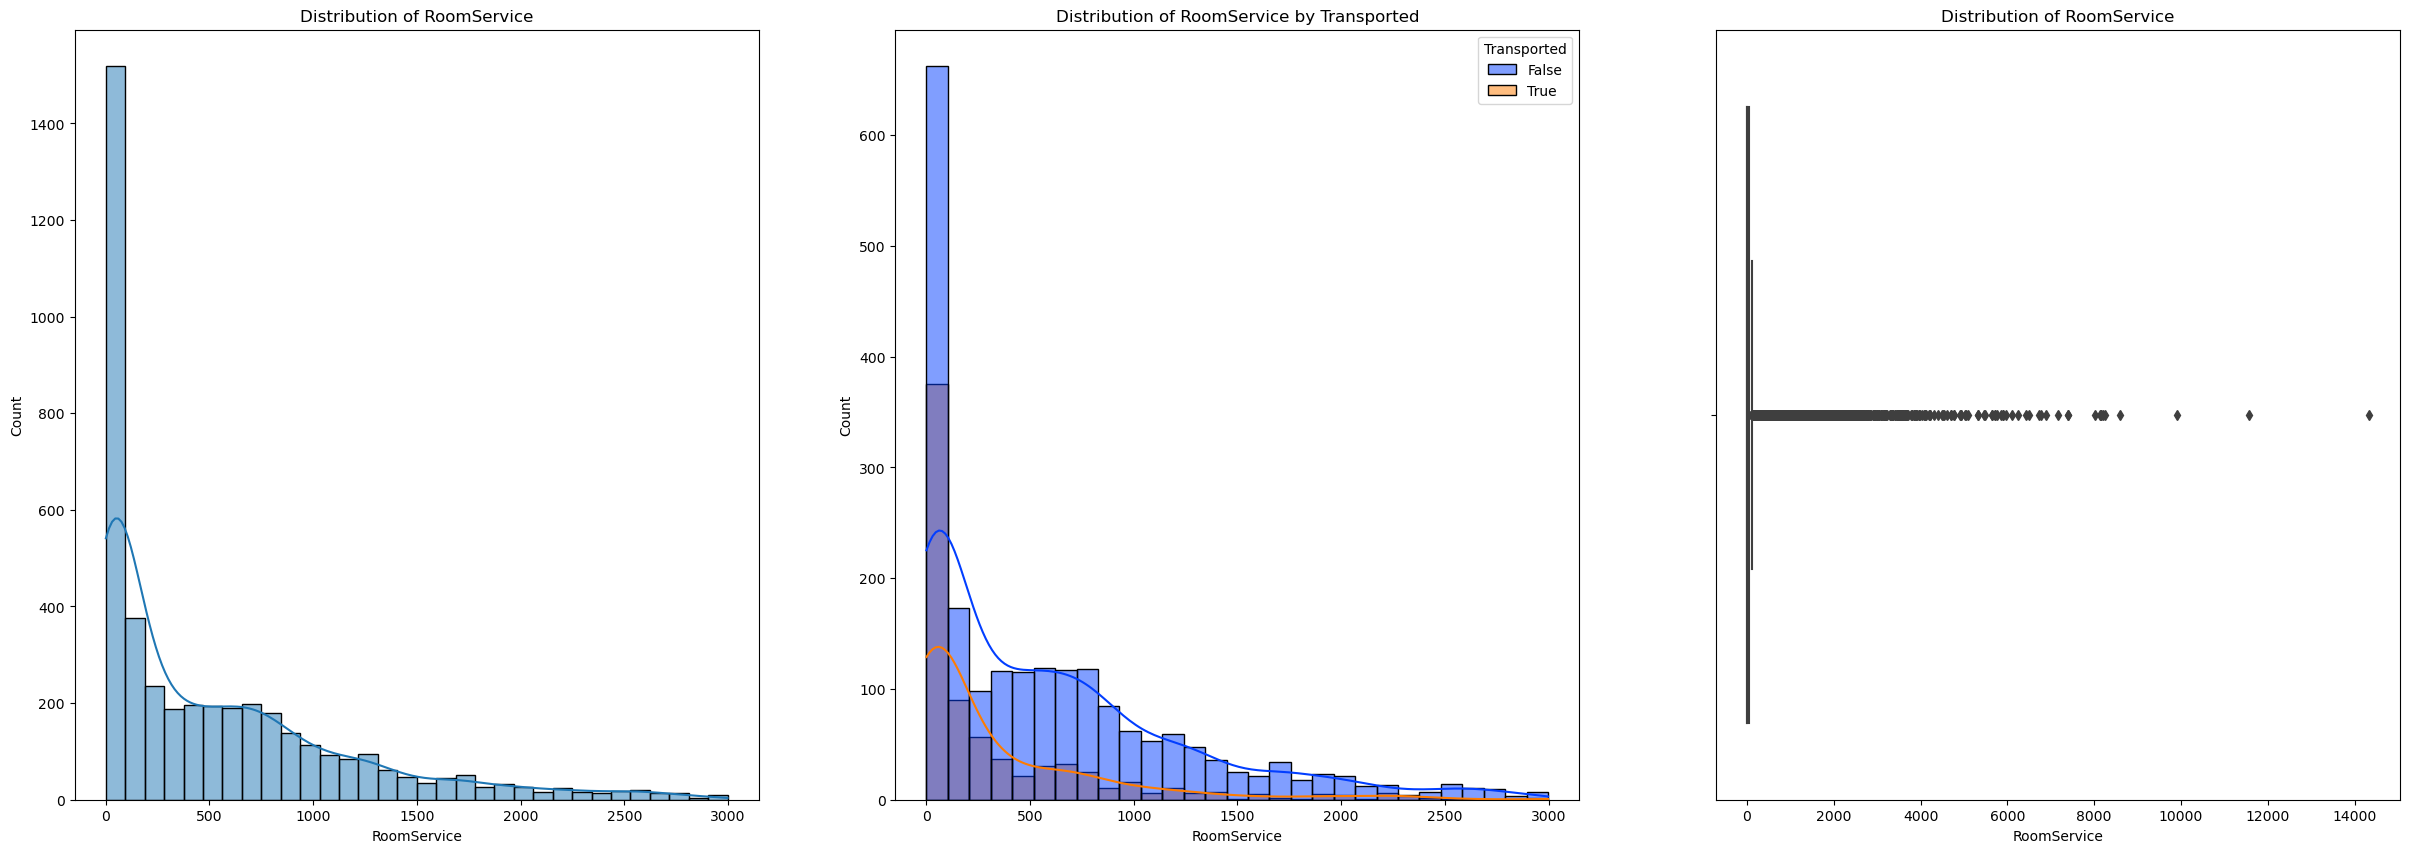

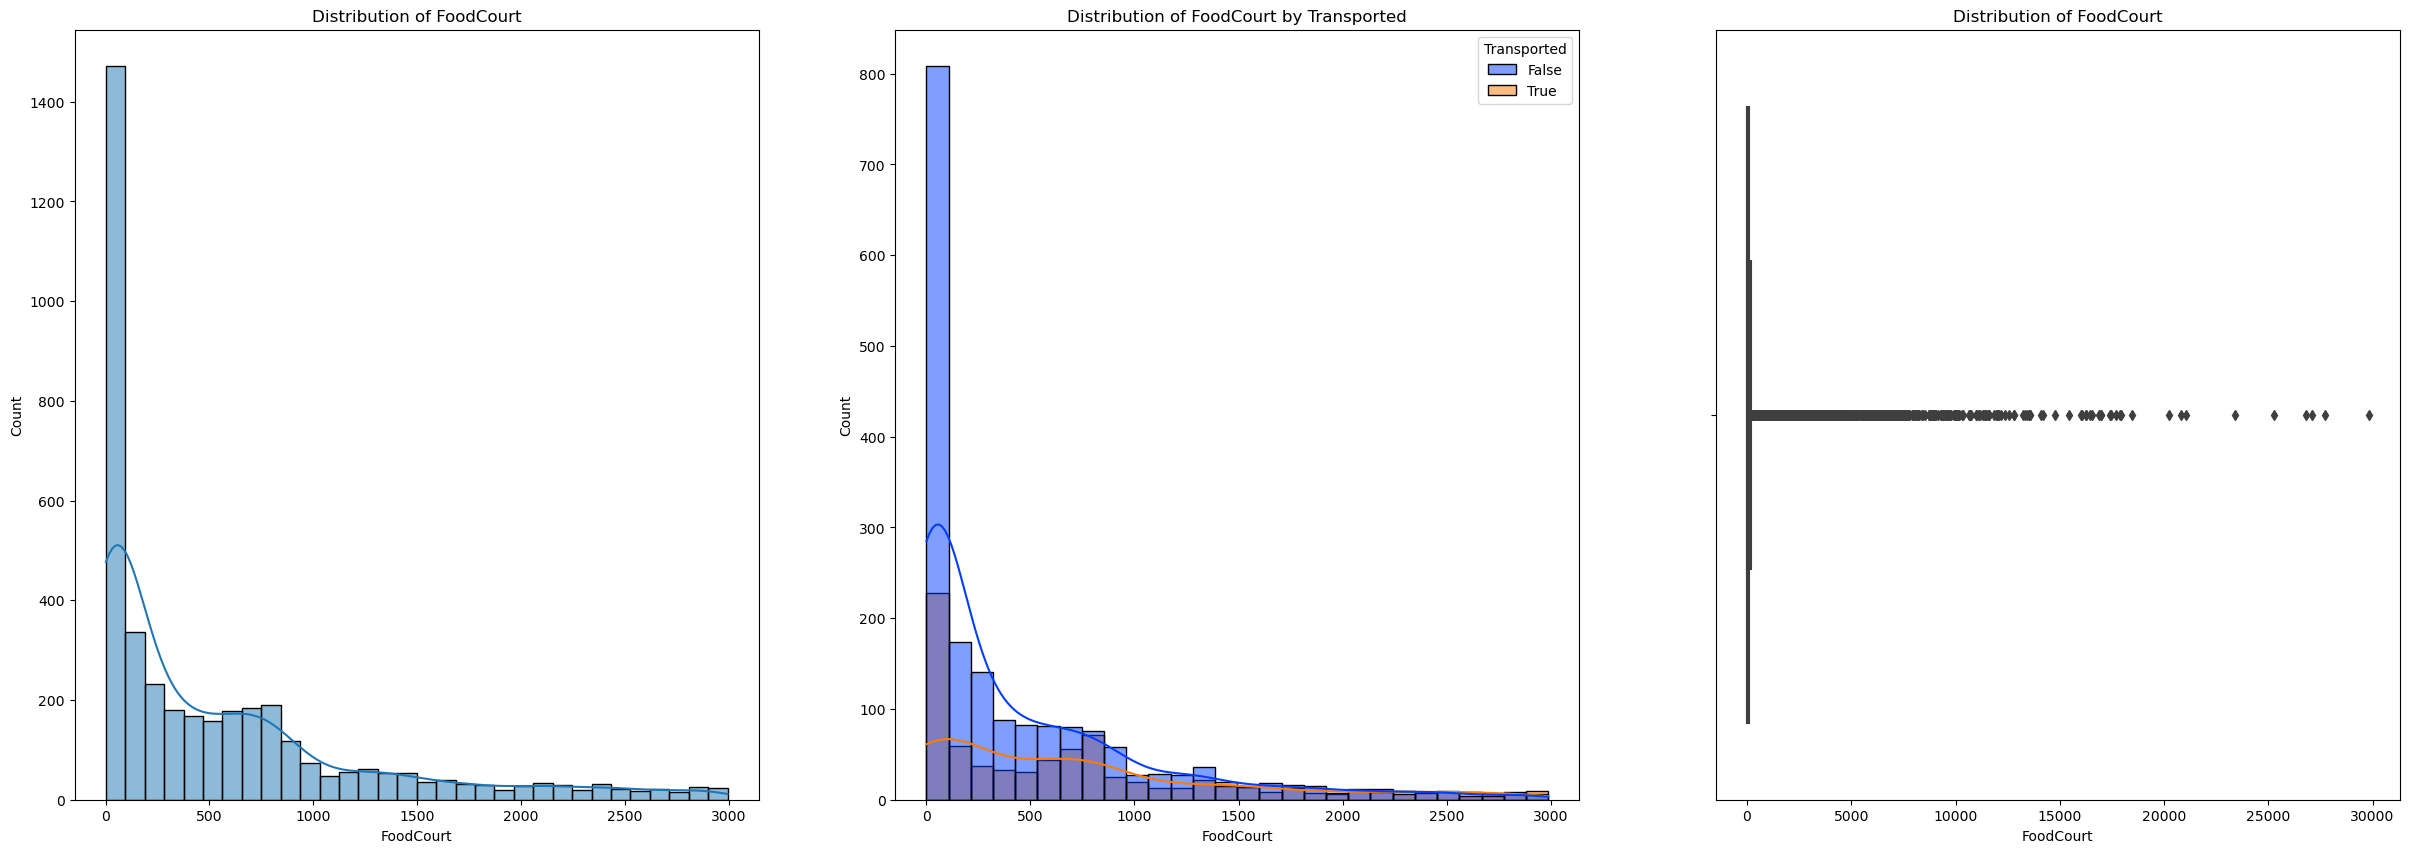

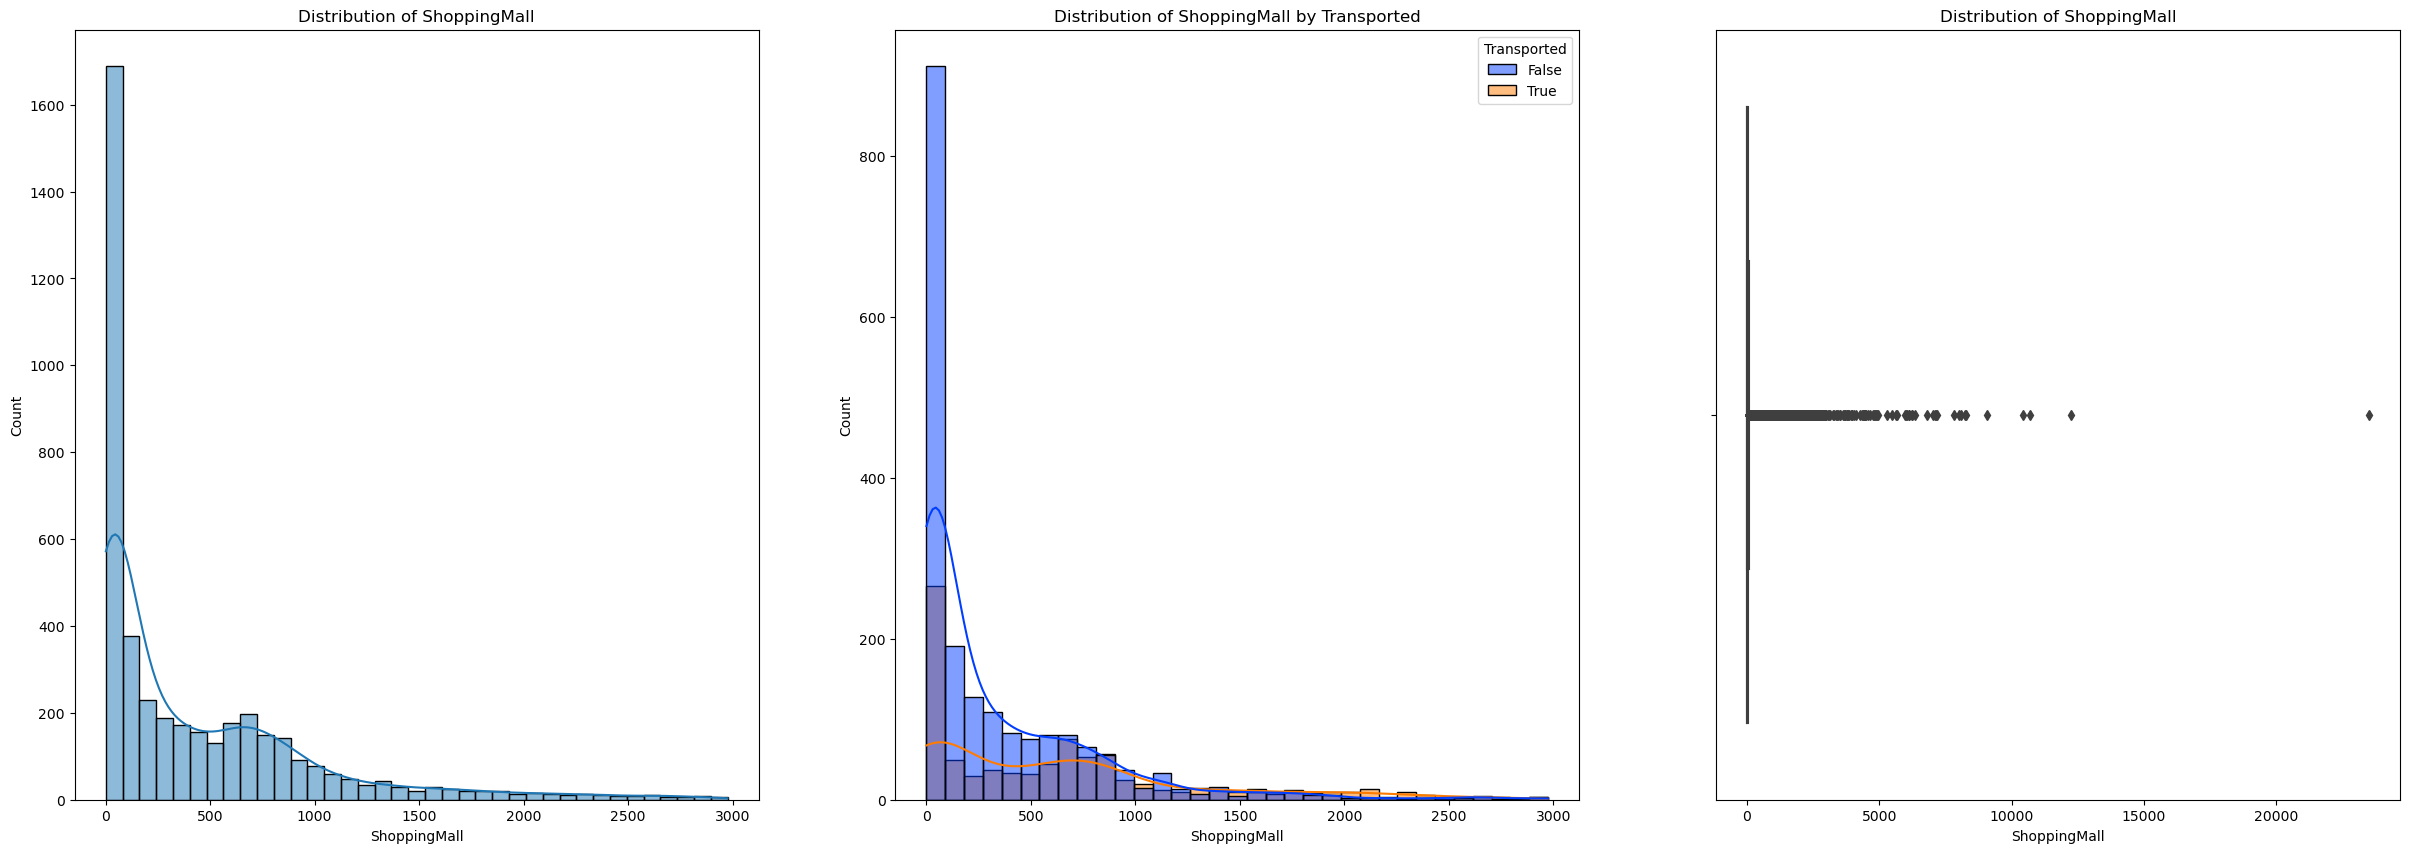

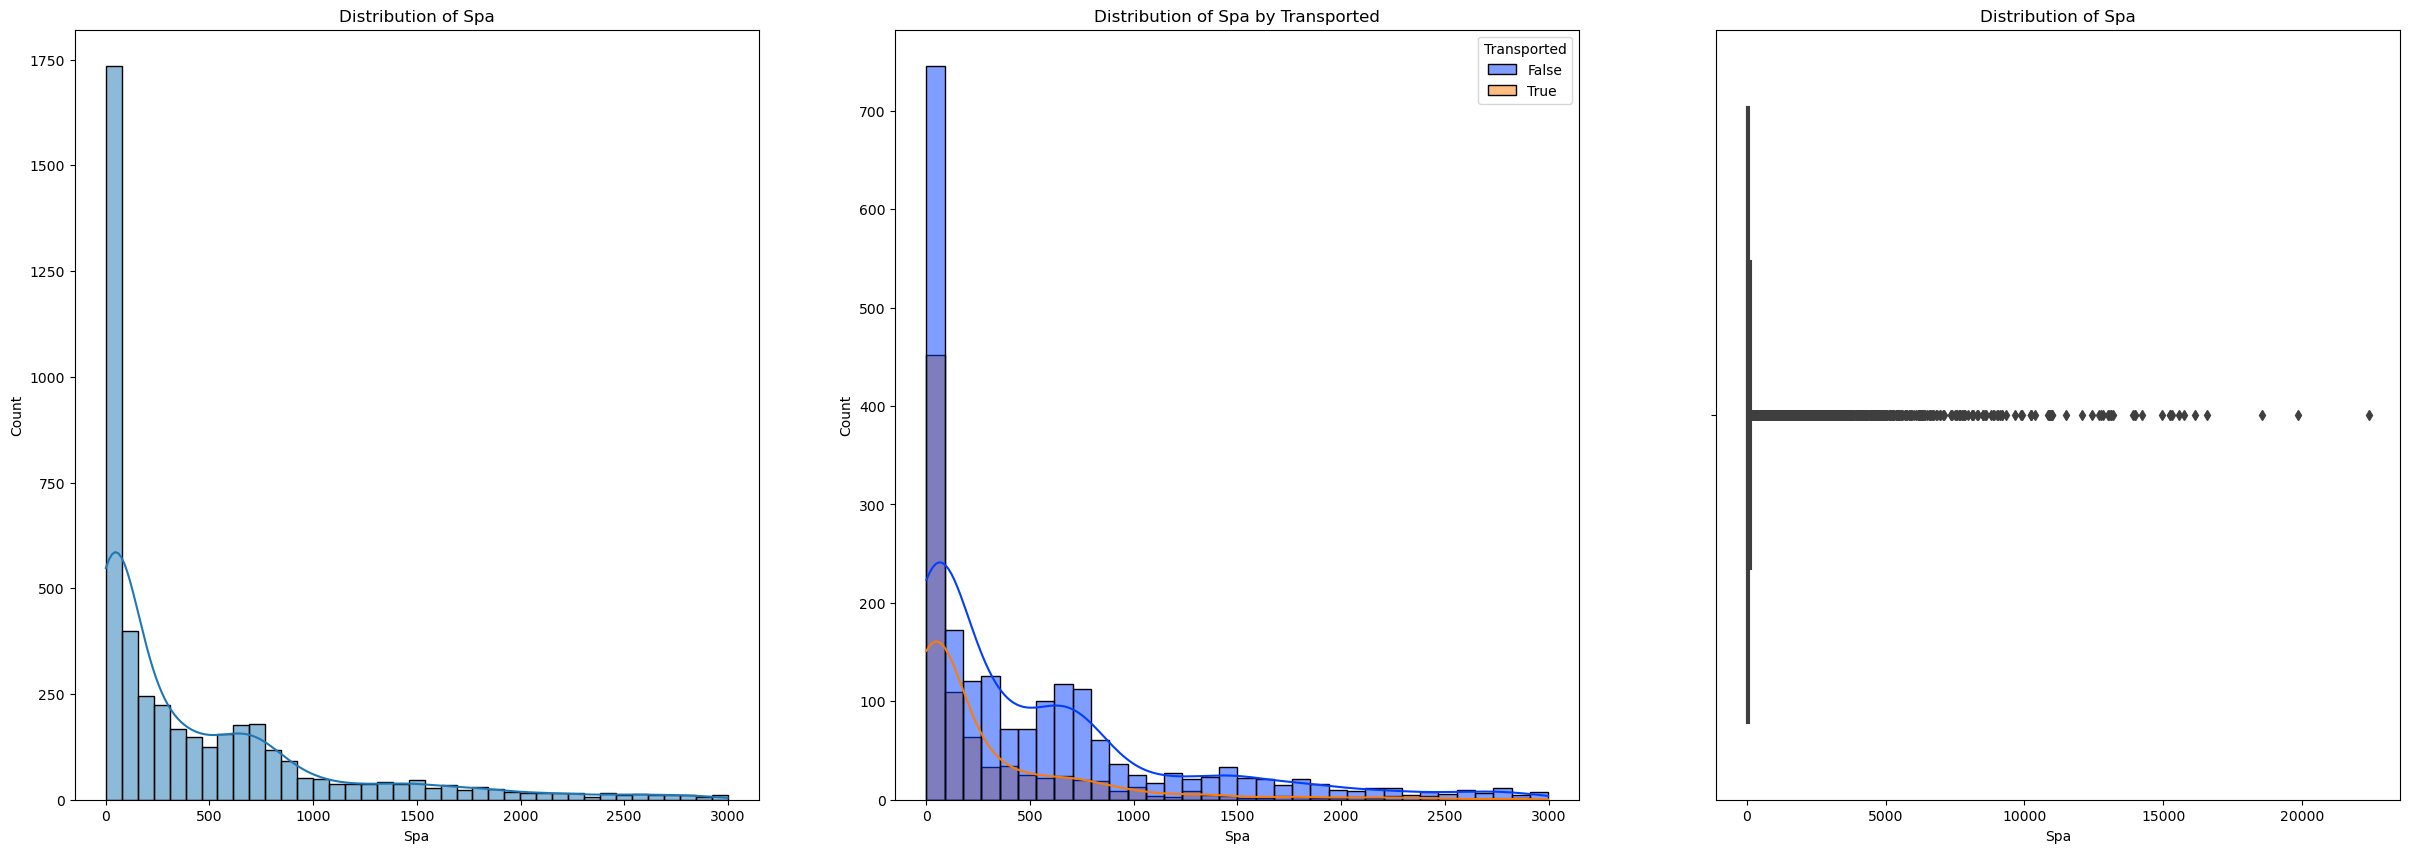

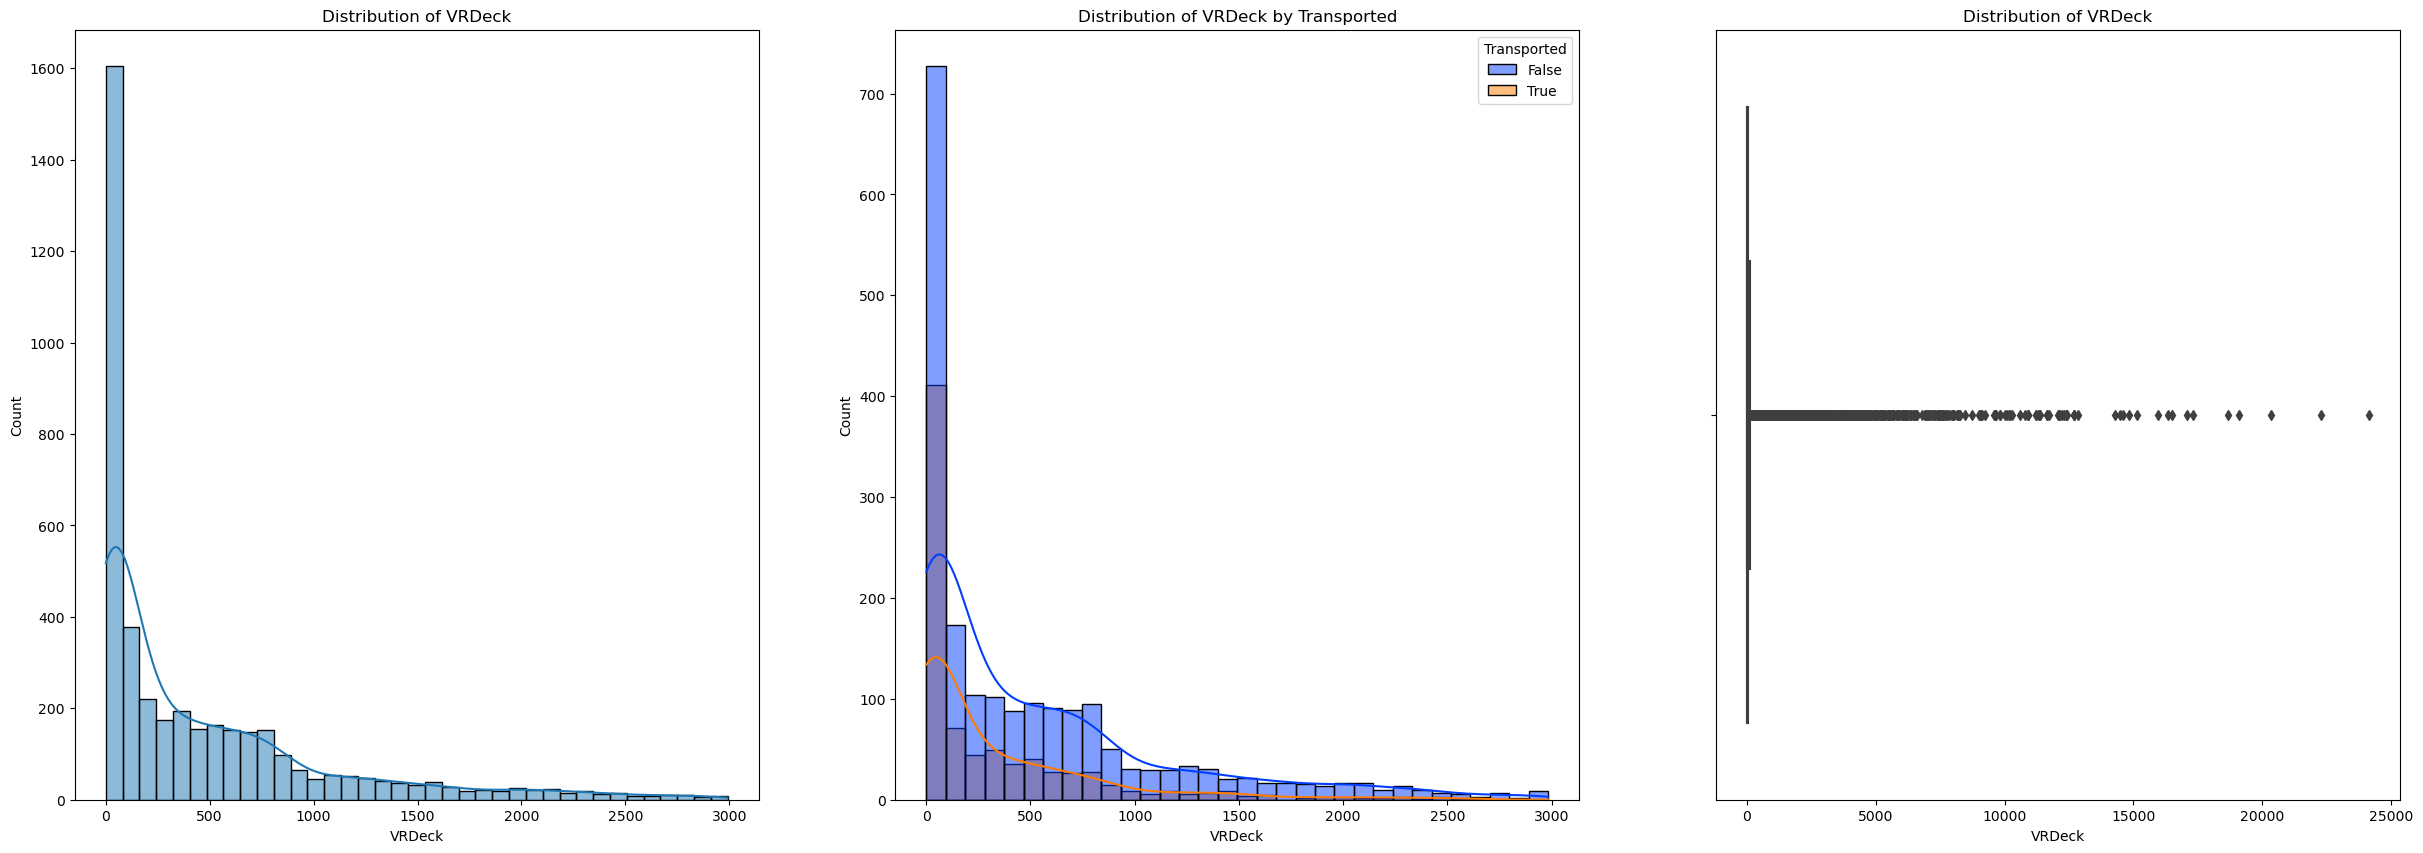

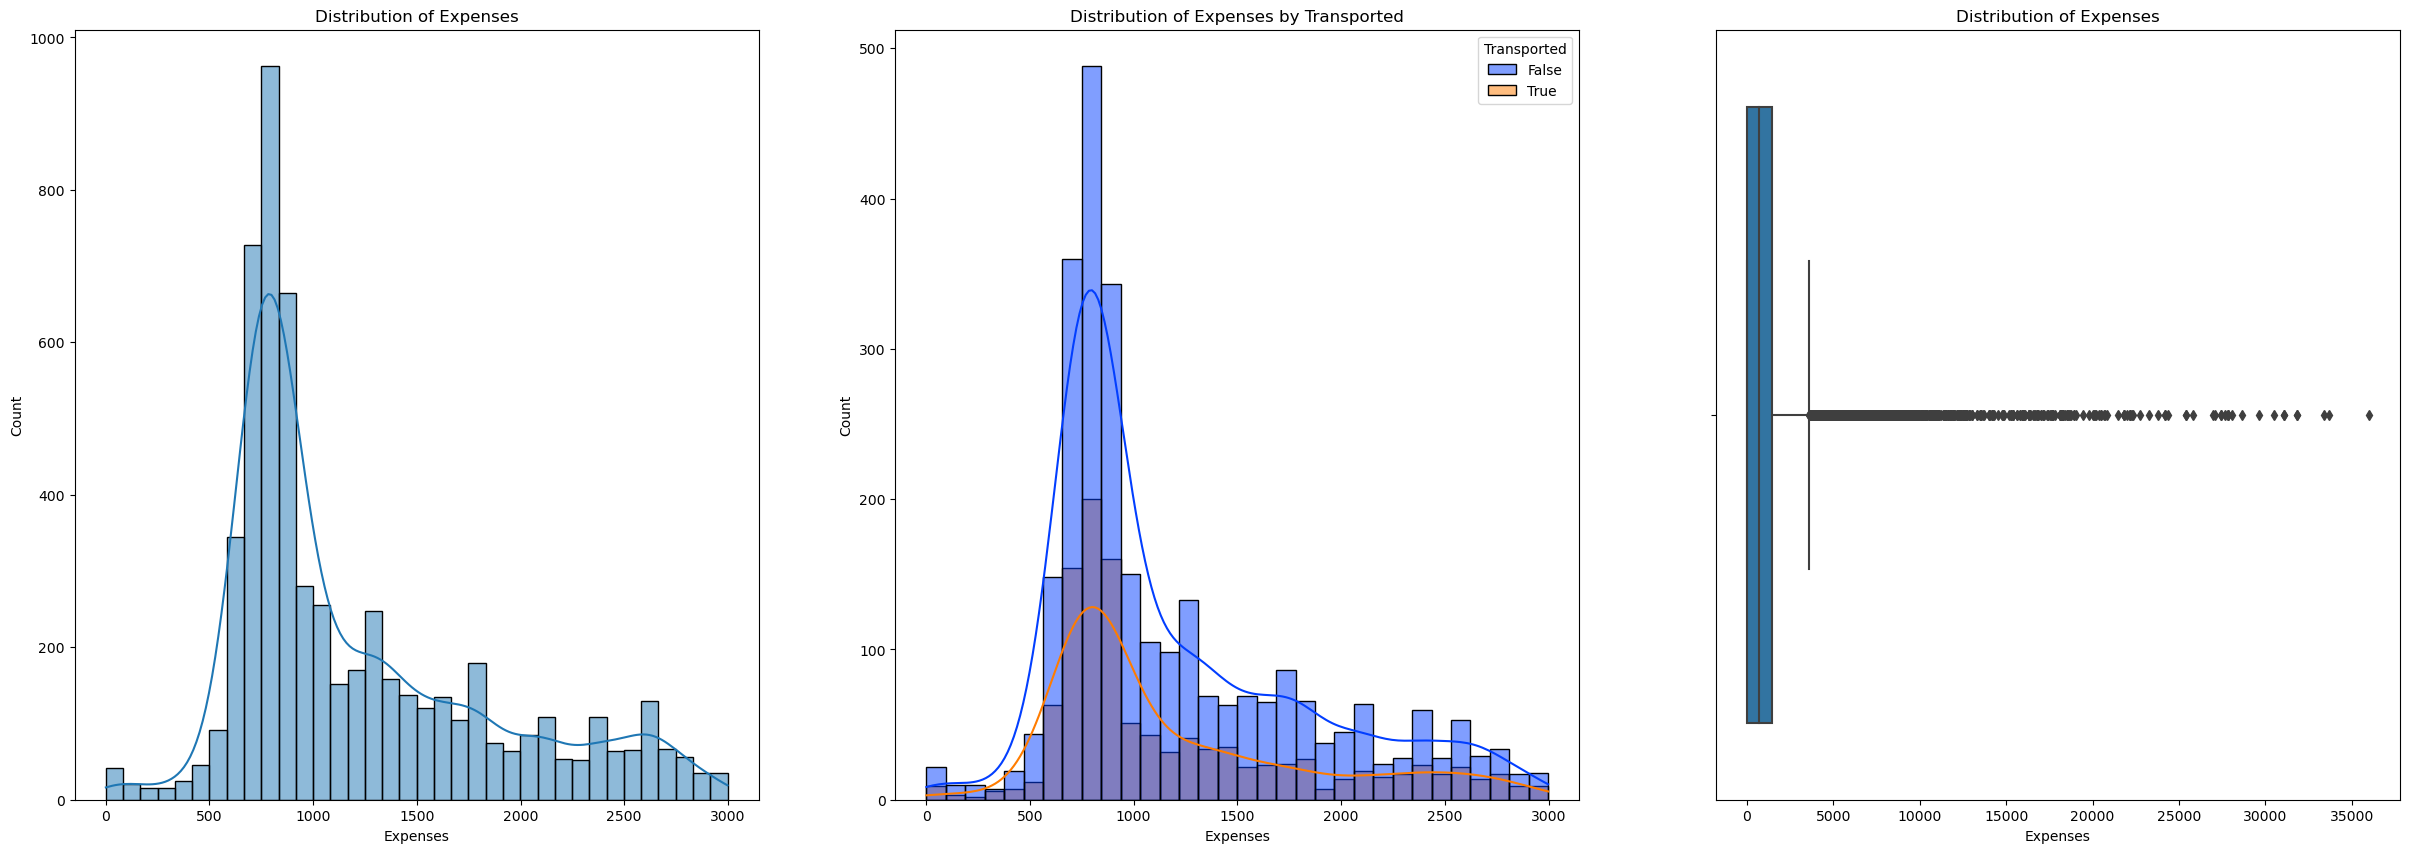

In [23]:
''' graphical distribution of the numeric variables '''
# select numerical columns
numerical_cols = [cname for cname in train_test.columns if train_test[cname].dtype in ['int64', 'float64']]
for i in numerical_cols:
    if i != 'Room':
        plt.figure(figsize=(30,10))
        plt.subplot(1,3,1)
        ax = sns.histplot(data = train_test[(train_test[i] > 0.25) & (train_test[i] < 3000)], x = i, kde = True)
        # Set the title to "Distribution of {column}
        ax.set_title(f"Distribution of {i}")
        plt.subplot(1,3,2)
        ax = sns.histplot(data = train_test[(train_test[i] > 0.25) & (train_test[i] < 3000)], x = i, hue= 'Transported', kde = True, palette='bright')
        # Set the title to "Distribution of {column} by Transported
        ax.set_title(f"Distribution of {i} by Transported")
        plt.subplot(1,3,3)
        ax = sns.boxplot(data = train_test, x = i)
        # Set the title to "Distribution of {column}
        ax.set_title(f"Distribution of {i}")
        plt.show()

The numeric variables have a clearly unbalanced distribution, as a large part of the data volume is concentrated in a single value, in this case, 0. We should consider whether or not we want to categorize them. Another option could be to use a *Yeo-Johnson* transformation to rescale the data and obtain a normal distribution.

In general, it can be seen that the distribution is similar for both target values. However, we can obtain information from the graphs. For example, it can be seen that although there is not much difference in `Age`, children are more at risk of being transported.

## Categorical Data Exploration

In [24]:
''' distribution of the categorical variables '''
train_test.describe(include='O').T

count unique               top   freq
PassengerId    12970  12970           0001_01      1
HomePlanet     12813      3             Earth   6914
CryoSleep      12796      2             False   8079
Cabin          12808   9825          F/1194/P      8
Destination    12816      3       TRAPPIST-1e   8958
VIP            12798      2             False  12525
Name           12676  12629  Carry Contrevins      2
Transported     8693      2              True   4378
Room           12970   9280              6499      8
Cabin_y        12808   9119          F/1838/P      8
VIP_y          12798      2             False  12527
HomePlanet_y   12813      3             Earth   6914
Destination_y  12816      3       TRAPPIST-1e   8993
Deck           12808      8                 F   4268
Cabin_num      12808   1894                82     34
Side           12808      2                 S   6454
FirstName      12676  12629  Carry Contrevins      2
SecondName     12676   2406         Buckentry     19
Name_key       12676   9536     Fulloydez8728      8

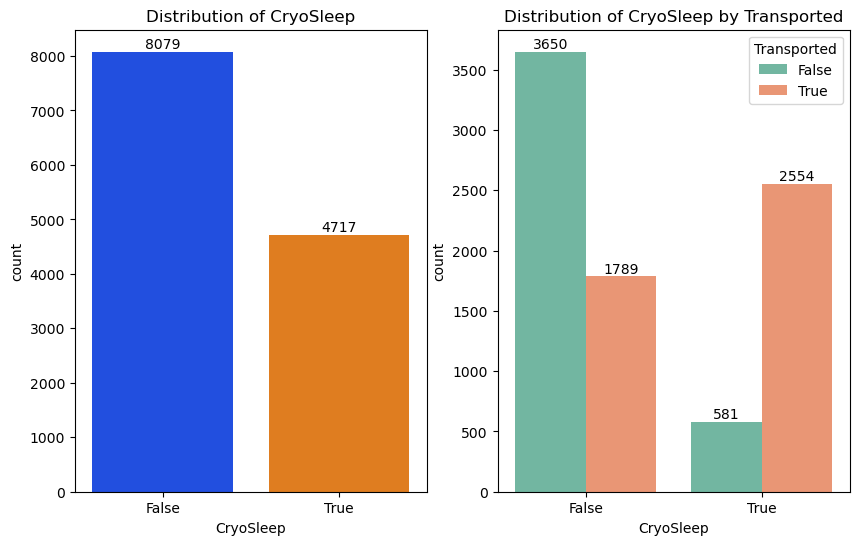

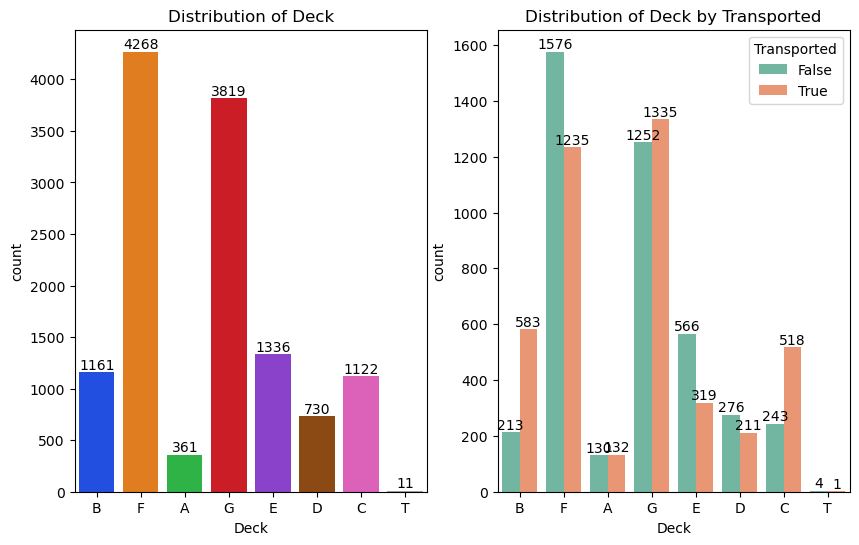

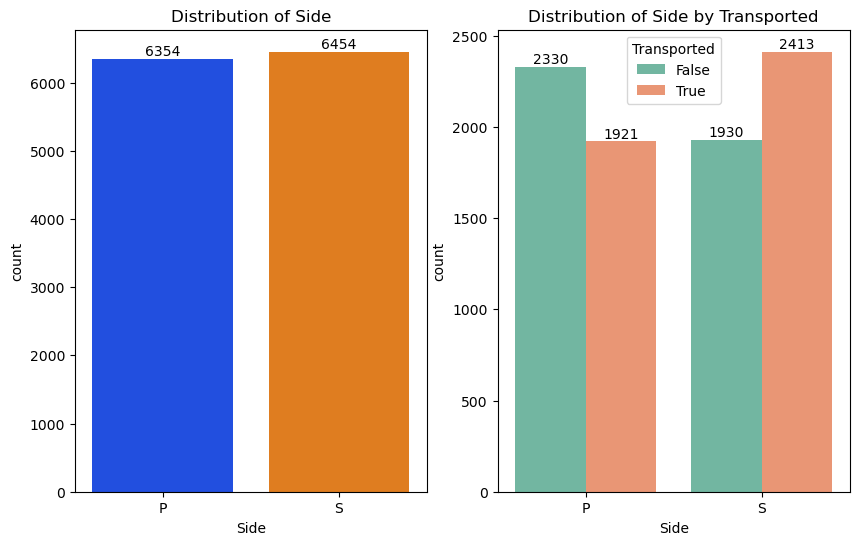

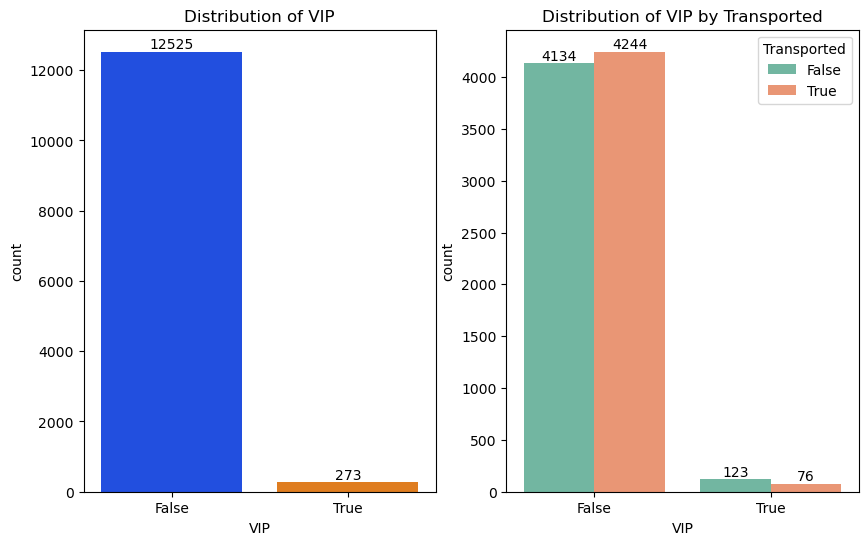

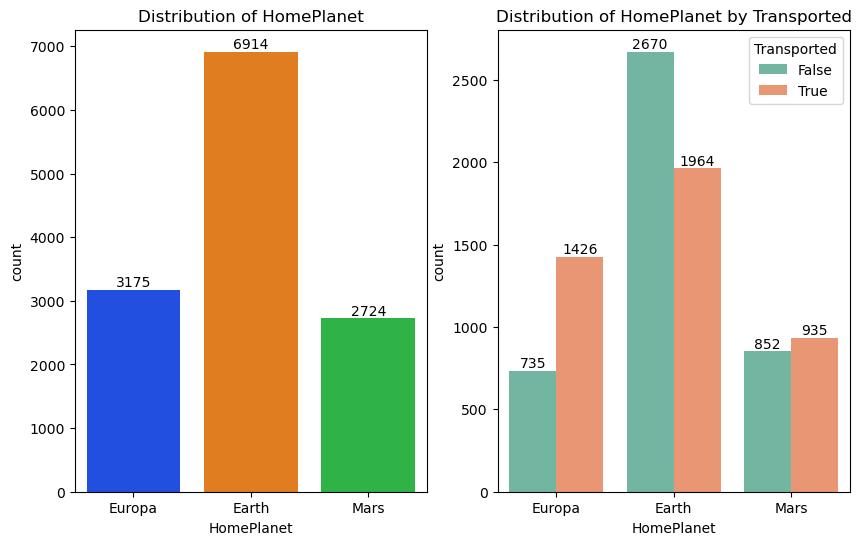

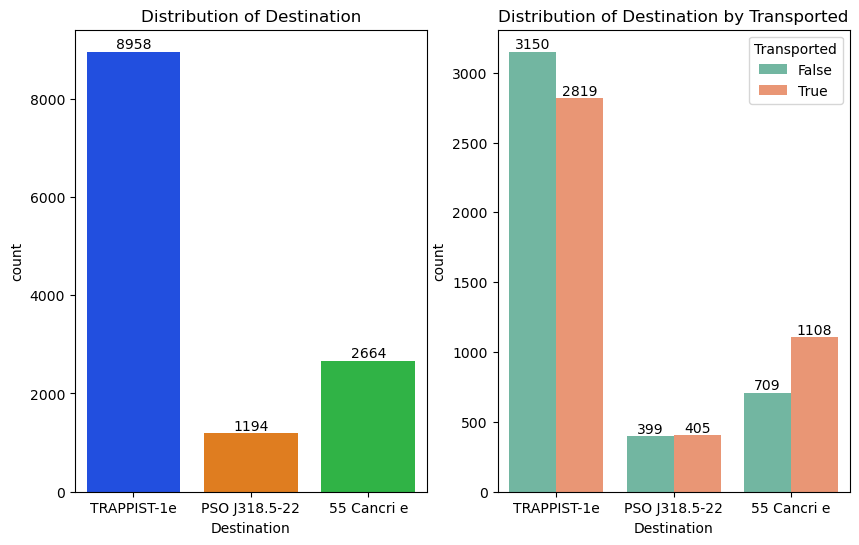

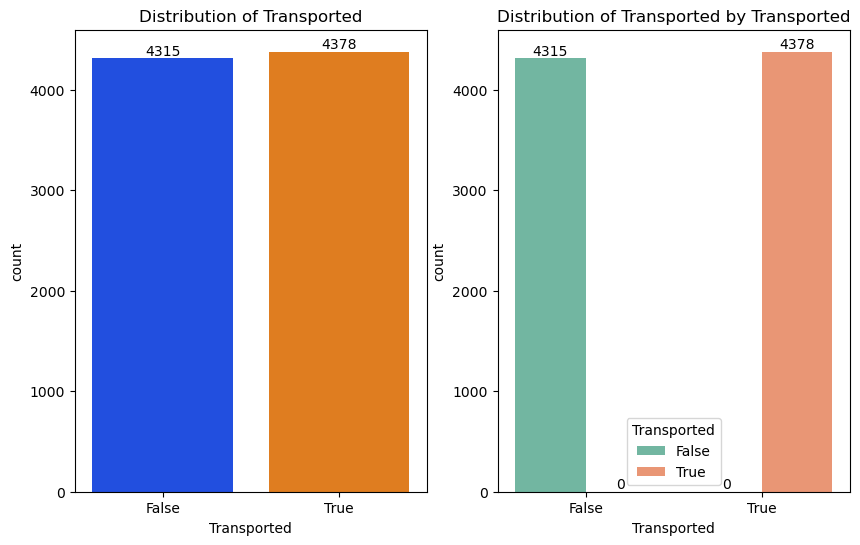

In [25]:
''' graphical distribution of the categorical variables '''

categorical_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination','Transported']

for c in categorical_cols:
        plt.figure(figsize= (10,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(data = train_test, x = c, palette = 'bright')
        # Set the title to "Distribution of {column}
        ax.set_title(f"Distribution of {c}")
        for container in ax.containers:
            ax.bar_label(container)
        plt.subplot(1,2,2)
        ax = sns.countplot(data = train_test, x = c, hue = 'Transported', palette = 'Set2')
        # Set the title to "Distribution of {column}
        ax.set_title(f"Distribution of {c} by Transported")
        for container in ax.containers:
            ax.bar_label(container)
        plt.show()

The categorical variables are fairly well distributed, except for `VIP`, which is completely unbalanced and may not provide much information.

We can see a certain relationship between the variables and the target. Since these variables have few categories, they will be transformed into *dummies* using `OneHotEncoder`. This treatment may not be necessary for some algorithms, but for others, it is better to provide categorical variables as dummies.

<Figure size 1000x600 with 0 Axes>

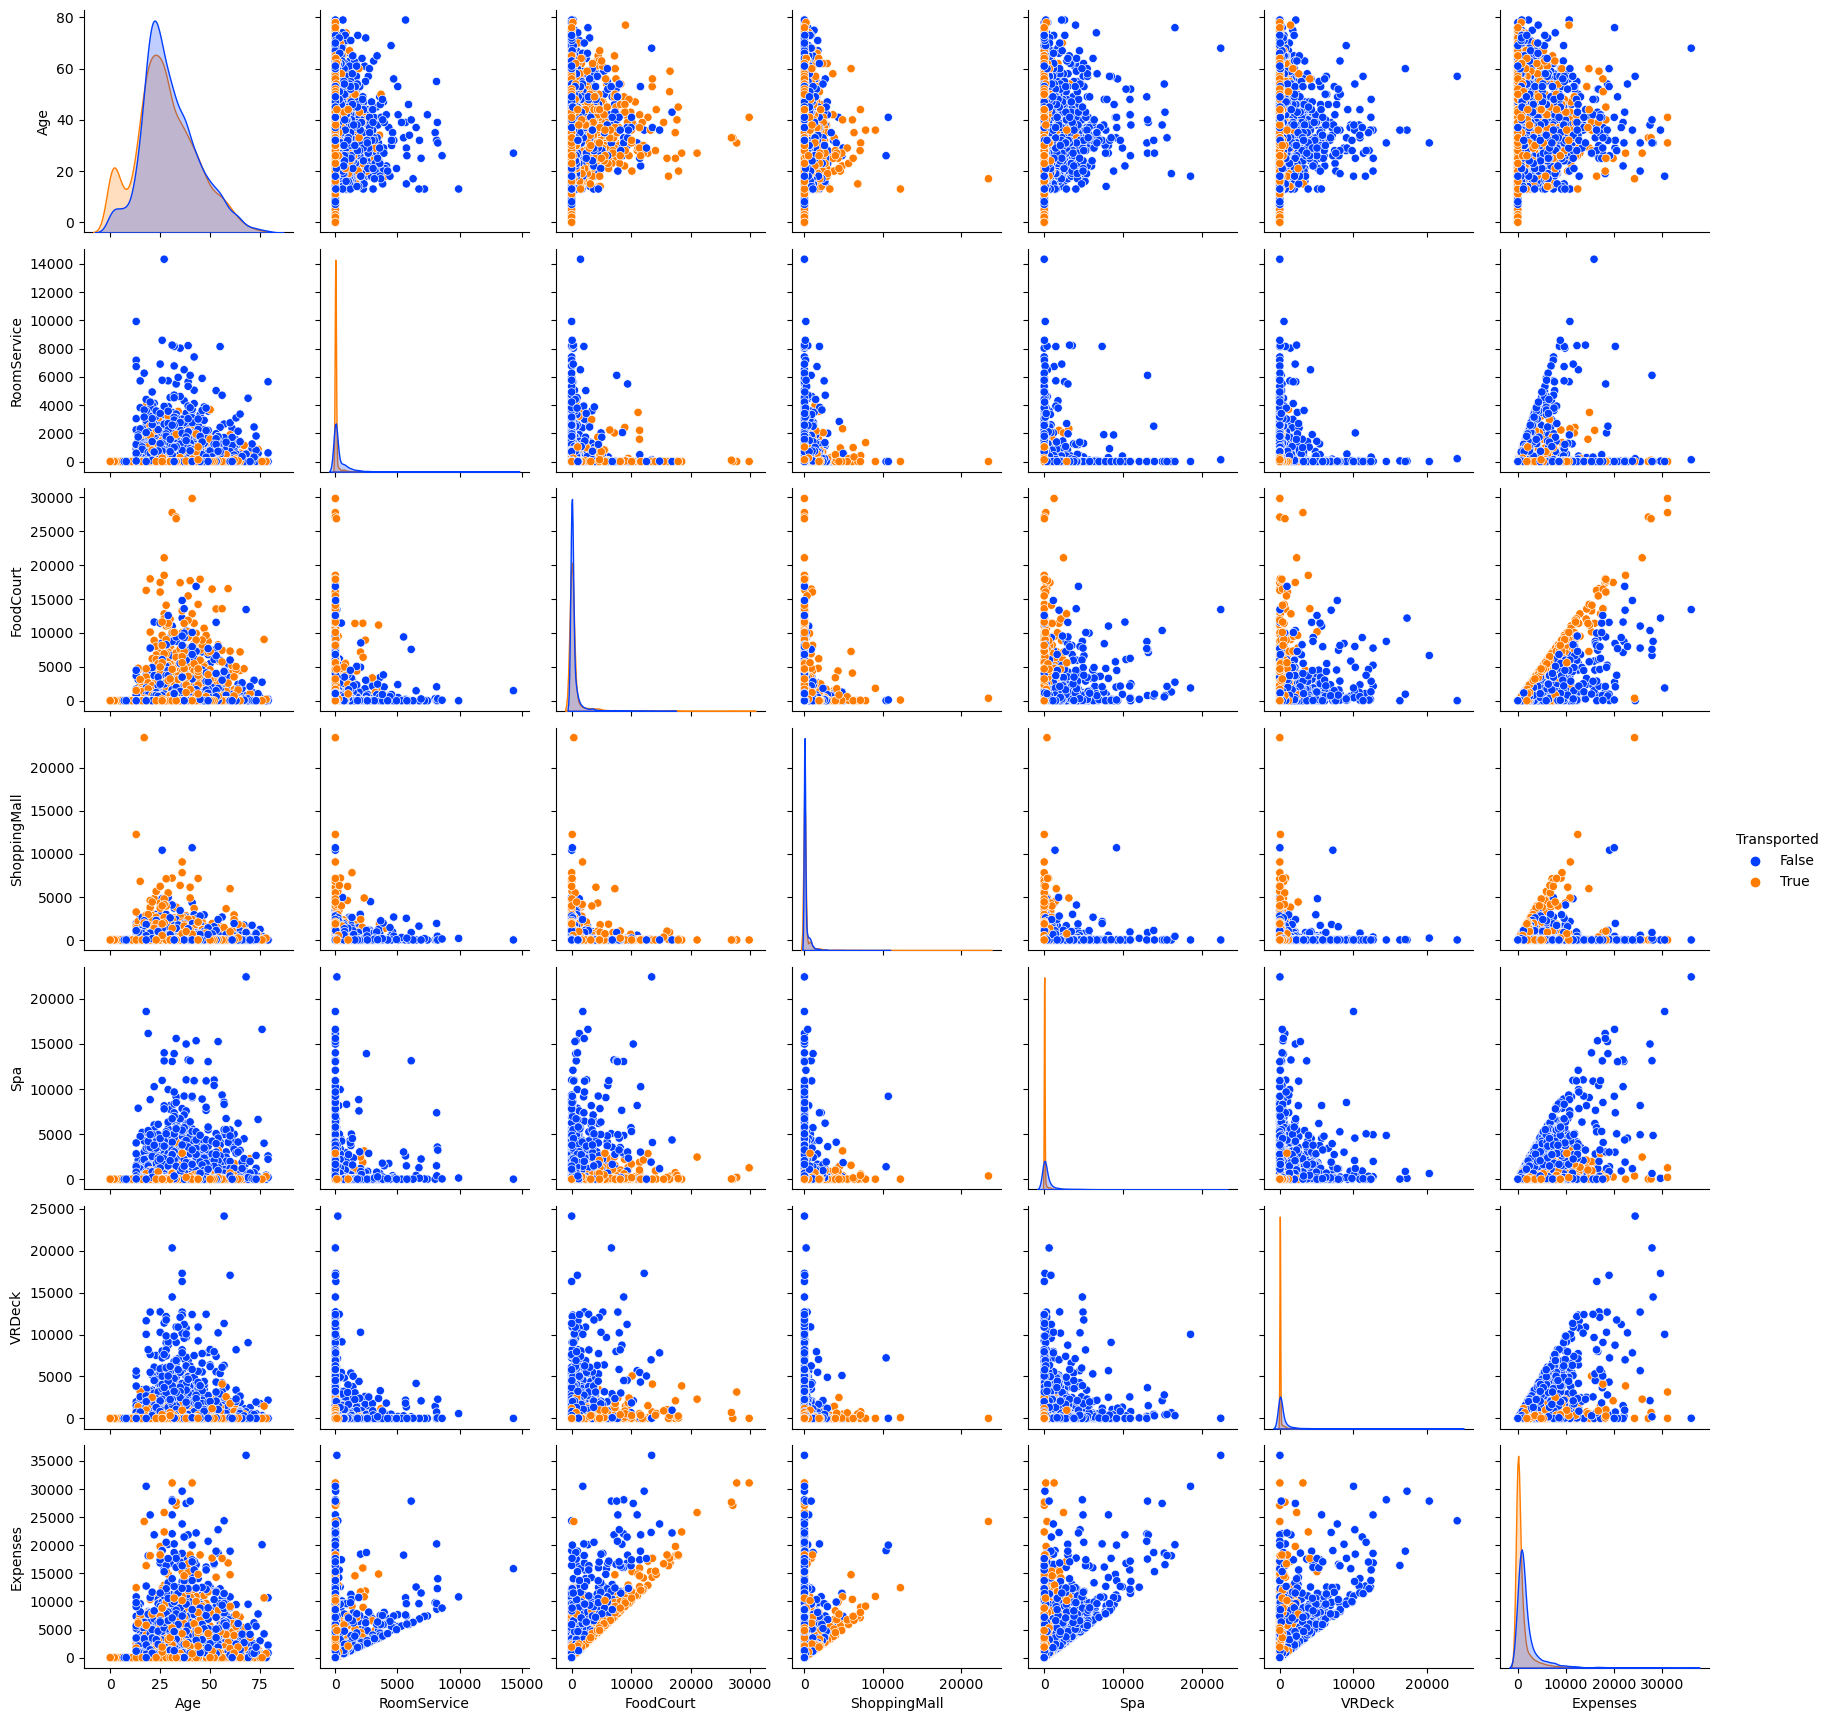

In [26]:
# Plot pairwise relationships between selected features
plt.figure(figsize=(10,6))
sns.pairplot(train_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenses','Transported']], hue='Transported', palette= 'bright')
plt.show()
# 'hue' parameter specifies the column in the dataset that determines the color of the points
# In this case, the points will be colored according to the 'Transported' column, which indicates
# whether or not a person was transported to the vacation location via a special mode of transport.
# The pairplot will show the pairwise relationships between the selected features, with different
# colors indicating whether or not a person was transported.

# Variable treatment

In this step, we will perform a variable treatment in order to create the models later on.

Great, let's dive into variable treatment!

The first step would be to convert the categorical variables into dummy variables, so we can use them in our models. We will use `OneHotEncoder` from `sklearn.preprocessing` to do this. The problem is we have `nan` values, so, first, we would have to use `LabelEncoder` to impute missing values using `KNNImputer`.

Next, we will apply a *Yeo-Johnson* transformation to the numerical variables to get a normal distribution. This will help us to better fit our models.

Finally, we will scale out data using `StandardScaler`.

In [27]:
''' convert cat cols to numeric cols '''

categorical_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination']
# we want to save destination values pre label encoder to use it later

le = LabelEncoder()
# for example female = 0 male = 1
for c in categorical_cols:
    # transform to numerical values those that are not null
    # then we'll impute null values with KNN
    train_test.loc[:,c] = le.fit_transform(train_test.loc[:,c])
    if c == 'Destination':
        dest = le.classes_
    if c == 'Destination':
        origin = le.classes_

train_test[categorical_cols].head()

CryoSleep  Deck  Side  VIP  HomePlanet  Destination
0          0     1     0    0           1            2
1          0     5     1    0           0            2
2          0     0     1    1           1            2
3          0     0     1    0           1            2
4          0     5     1    0           0            2

In [28]:
dest

array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object)

In [29]:
train_test['Transported'] = train_test['Transported'].apply(lambda x: 1 if x == True else 0 if x == False else x)

In [30]:
''' imputation of variables '''

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenses',
                  'Cabin_num']

# impute the rest of the variables
knn = KNNImputer(n_neighbors=int(sqrt(train_test.shape[0])), weights= 'distance', metric= 'nan_euclidean')
# I have to tell him that the reference columns for the nearest neighbors
# must be numeric, although it can be fine-tuned.
cat_imputed = train_test[numerical_cols+categorical_cols] # recordemos que siempre doble corchete
cat_imputed = pd.DataFrame(knn.fit_transform(cat_imputed))
cat_imputed.columns = train_test[numerical_cols+categorical_cols].columns

train_test[numerical_cols+categorical_cols] = cat_imputed

In [31]:
train_test

PassengerId  HomePlanet  CryoSleep     Cabin  Destination        Age  \
0         0001_01         1.0        0.0     B/0/P          2.0  39.000000   
1         0002_01         0.0        0.0     F/0/S          2.0  24.000000   
2         0003_01         1.0        0.0     A/0/S          2.0  58.000000   
3         0003_02         1.0        0.0     A/0/S          2.0  33.000000   
4         0004_01         0.0        0.0     F/1/S          2.0  16.000000   
...           ...         ...        ...       ...          ...        ...   
12965     9266_02         0.0        1.0  G/1496/S          2.0  34.000000   
12966     9269_01         0.0        0.0       NaN          2.0  42.000000   
12967     9271_01         2.0        1.0   D/296/P          0.0  29.037965   
12968     9273_01         1.0        0.0   D/297/P          3.0  35.931696   
12969     9277_01         0.0        1.0  G/1498/S          1.0  43.000000   

       VIP  RoomService  FoodCourt  ShoppingMall  ...   Cabin_y  VIP_y  \
0      0.0          0.0        0.0           0.0  ...     B/0/P  False   
1      0.0        109.0        9.0          25.0  ...     F/0/S  False   
2      1.0         43.0     3576.0           0.0  ...     A/0/S   True   
3      0.0          0.0     1283.0         371.0  ...     A/0/S   True   
4      0.0        303.0       70.0         151.0  ...     F/1/S  False   
...    ...          ...        ...           ...  ...       ...    ...   
12965  0.0          0.0        0.0           0.0  ...  F/1796/S  False   
12966  0.0          0.0      847.0          17.0  ...       NaN  False   
12967  0.0          0.0        0.0           0.0  ...   D/296/P  False   
12968  0.0          0.0     2680.0           0.0  ...   D/297/P  False   
12969  0.0          0.0        0.0           0.0  ...  G/1498/S  False   

      HomePlanet_y  Destination_y  Deck    Cabin_num Side          FirstName  \
0           Europa    TRAPPIST-1e   1.0     0.000000  0.0    Maham Ofracculy   
1            Earth    TRAPPIST-1e   5.0     0.000000  1.0       Juanna Vines   
2           Europa    TRAPPIST-1e   0.0     0.000000  1.0      Altark Susent   
3           Europa    TRAPPIST-1e   0.0     0.000000  1.0       Solam Susent   
4            Earth    TRAPPIST-1e   5.0     1.000000  1.0  Willy Santantines   
...            ...            ...   ...          ...  ...                ...   
12965        Earth    TRAPPIST-1e   6.0  1496.000000  1.0        Jeron Peter   
12966        Earth    TRAPPIST-1e   8.0   655.102471  2.0      Matty Scheron   
12967         Mars    55 Cancri e   3.0   296.000000  0.0        Jayrin Pore   
12968       Europa            NaN   3.0   297.000000  0.0     Kitakan Conale   
12969        Earth  PSO J318.5-22   6.0  1498.000000  1.0   Lilace Leonzaley   

        SecondName         Name_key  
0        Ofracculy    Ofracculy0001  
1            Vines        Vines0002  
2           Susent       Susent0003  
3           Susent       Susent0003  
4      Santantines  Santantines0004  
...            ...              ...  
12965        Peter        Peter9266  
12966      Scheron      Scheron9269  
12967         Pore         Pore9271  
12968       Conale       Conale9273  
12969    Leonzaley    Leonzaley9277  

[12970 rows x 26 columns]

In [32]:
train_test.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             162
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
Expenses            0
Room                0
Cabin_y           162
VIP_y             172
HomePlanet_y      157
Destination_y     154
Deck                0
Cabin_num           0
Side                0
FirstName         294
SecondName        294
Name_key          294
dtype: int64

In [33]:
for i in range(len(origin)):
    train_test.loc[train_test['HomePlanet'] == i,'HomePlanet'] = origin[i]

In [34]:
for i in range(len(dest)):
    train_test.loc[train_test['Destination'] == i,'Destination'] = dest[i]

In [35]:
train_test['HomePlanet'].value_counts()

55 Cancri e      6914
PSO J318.5-22    3175
TRAPPIST-1e      2724
Name: HomePlanet, dtype: int64

In [36]:
train_test['Destination'].value_counts()

TRAPPIST-1e      8958
55 Cancri e      2664
PSO J318.5-22    1194
Name: Destination, dtype: int64

With the numeric variables imputed, we can create a couple of important variables

In [37]:
# Calculate the average of the 'FoodCourt' and 'ShoppingMall' columns and add to the dataframe as a new column
train_test['good_places'] = train_test[['FoodCourt', 'ShoppingMall']].sum(axis=1)/2

In [38]:
# Calculate the average of the 'RoomService', 'Spa', and 'VRDeck' columns and add to the dataframe as a new column
train_test['terube_places'] = train_test[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)/3

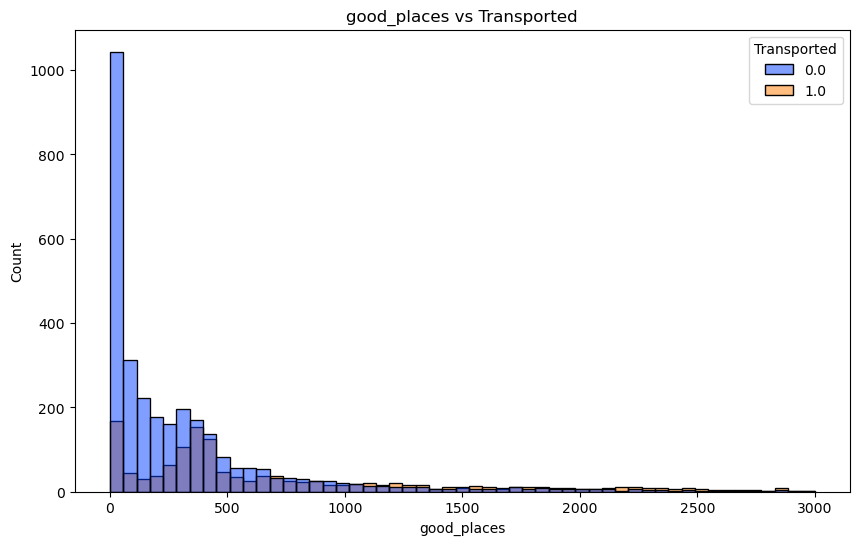

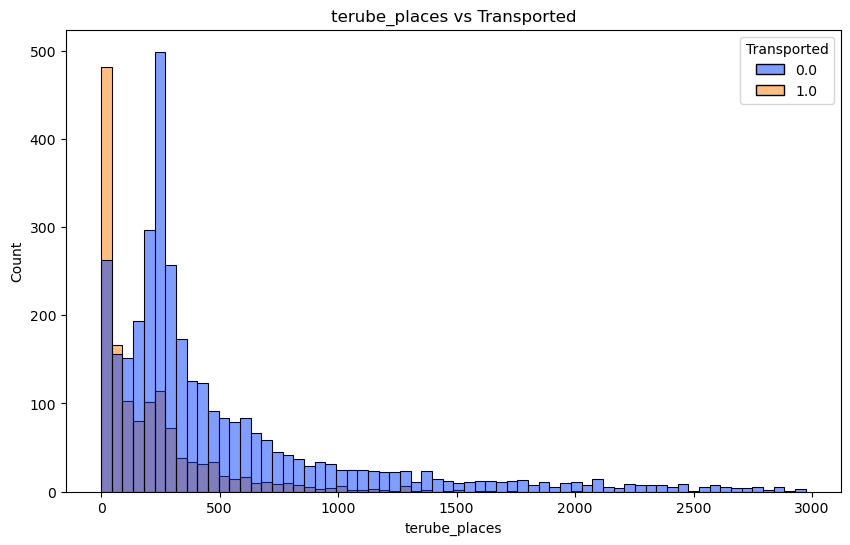

In [39]:
for i in ['good_places', 'terube_places']:
    plt.figure(figsize=(10,6))
    sns.histplot(x=i, hue='Transported', data=train_test[(train_test[i] > 0.25) & (train_test[i] < 3000)], palette='bright')
    # Add title to plot with the feature name and 'vs Transported'
    plt.title(f'{i} vs Transported')
    plt.show()

In [40]:
res = []
# Loop through the HomePlanet column and append the concatenated
# string of HomePlanet and Destination to the res list
for ind, i in enumerate(train_test["HomePlanet"]):
        res.append(f'{i}-{train_test["Destination"][ind]}')
train_test['Road'] = res

In [41]:
train_test['Road'].value_counts()

55 Cancri e-TRAPPIST-1e        4737
TRAPPIST-1e-TRAPPIST-1e        2328
PSO J318.5-22-TRAPPIST-1e      1780
PSO J318.5-22-55 Cancri e      1343
55 Cancri e-PSO J318.5-22      1083
55 Cancri e-55 Cancri e         995
TRAPPIST-1e-55 Cancri e         299
nan-TRAPPIST-1e                 113
55 Cancri e-nan                  99
TRAPPIST-1e-PSO J318.5-22        68
PSO J318.5-22-PSO J318.5-22      29
TRAPPIST-1e-nan                  29
nan-55 Cancri e                  27
PSO J318.5-22-nan                23
nan-PSO J318.5-22                14
nan-nan                           3
Name: Road, dtype: int64

In [42]:
train_test['Road'] = train_test['Road'].apply(lambda x: x if x in train_test['Road'].value_counts()[:5].index.tolist() else 'Other' )

In [43]:
train_test['Road'].value_counts()

55 Cancri e-TRAPPIST-1e      4737
TRAPPIST-1e-TRAPPIST-1e      2328
PSO J318.5-22-TRAPPIST-1e    1780
Other                        1699
PSO J318.5-22-55 Cancri e    1343
55 Cancri e-PSO J318.5-22    1083
Name: Road, dtype: int64

Now, we have the variables that we are going to use in general terms treated, without missing values and with categories made numeric to be able to work with them. There are problems such as the imbalance of the variable `VIP`, which is expressed in its low correlation, but in general we have made categories so that the correlation with respect to the target variable increases. Our next step would be to use `OneHotEncoder` on variables that have low cardinality (for example $<10$ categories) and standardize the data.

In [44]:
''' Apply OneHotEncoding PowerTransformer and StandardScaler'''

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenses',
                  'Cabin_num','terube_places','good_places']
categorical_cols = ['CryoSleep', 'Deck', 'Side', 'VIP', 'HomePlanet', 'Destination','Road']
# PowerTransformer to make distributions gaussian
yeo = PowerTransformer(method='yeo-johnson')
# StandardScaler to normalize numeric variables
numerical_transformer = StandardScaler()
# Dummies for categoricals
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False, drop = 'first')
# sparse = False gives you an array, not an sparse matrix
# drop = 'first' drops the first categorical column

# Pipeline for numericals
num_pipe = Pipeline(steps=[('powert',yeo), # make gaussian
                           ('scaler',numerical_transformer)]) # estandarize

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_pipe, numerical_cols),
        ('cat',categorical_transformer, categorical_cols)
    ])

In [45]:
preprocessor.fit(train_test[numerical_cols+categorical_cols])
print(preprocessor.get_feature_names_out())

['num__Age' 'num__RoomService' 'num__FoodCourt' 'num__ShoppingMall'
 'num__Spa' 'num__VRDeck' 'num__Expenses' 'num__Cabin_num'
 'num__terube_places' 'num__good_places' 'cat__CryoSleep_1.0'
 'cat__CryoSleep_2.0' 'cat__Deck_1.0' 'cat__Deck_2.0' 'cat__Deck_3.0'
 'cat__Deck_4.0' 'cat__Deck_5.0' 'cat__Deck_6.0' 'cat__Deck_7.0'
 'cat__Deck_8.0' 'cat__Side_1.0' 'cat__Side_2.0' 'cat__VIP_1.0'
 'cat__VIP_2.0' 'cat__HomePlanet_PSO J318.5-22'
 'cat__HomePlanet_TRAPPIST-1e' 'cat__HomePlanet_nan'
 'cat__Destination_PSO J318.5-22' 'cat__Destination_TRAPPIST-1e'
 'cat__Destination_nan' 'cat__Road_55 Cancri e-TRAPPIST-1e'
 'cat__Road_Other' 'cat__Road_PSO J318.5-22-55 Cancri e'
 'cat__Road_PSO J318.5-22-TRAPPIST-1e' 'cat__Road_TRAPPIST-1e-TRAPPIST-1e']


In [46]:
# this is just to eliminate the prefix 'num' and 'cat' of the variables
names = []
for i in preprocessor.get_feature_names_out():
    names.append(i[5:])

In [47]:
output = pd.DataFrame(preprocessor.fit_transform(train_test[numerical_cols+categorical_cols]), columns=names)
output['Transported'] = train_test['Transported']
train_test = output
train_test

Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0      0.738662    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
1     -0.266155     1.406602   0.715999      1.209394  1.534001  1.264777   
2      1.881764     1.247964   1.636407     -0.699939  1.671186  1.286170   
3      0.350700    -0.707787   1.583752      1.594214  1.644893  1.490792   
4     -0.864176     1.523664   1.256951      1.512784  1.536432  0.209172   
...         ...          ...        ...           ...       ...       ...   
12965  0.416494    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
12966  0.927033    -0.707787   1.555886      1.108616  0.759715  1.456208   
12967  0.084997    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
12968  0.542259    -0.707787   1.623594     -0.699939 -0.743207  1.581248   
12969  0.989075    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   

       Expenses  Cabin_num  terube_places  good_places  ...  HomePlanet_nan  \
0     -1.139519  -2.449121      -1.039484    -0.953176  ...             0.0   
1      0.578428  -2.449121       0.882893     0.294160  ...             0.0   
2      1.503404  -2.449121       1.542546     1.456567  ...             0.0   
3      1.244337  -2.449121       1.358478     1.311943  ...             0.0   
4      0.705999  -2.353264       0.948225     0.849698  ...             0.0   
...         ...        ...            ...          ...  ...             ...   
12965 -1.139519   1.419317      -1.039484    -0.953176  ...             0.0   
12966  0.683312   0.398258       0.404058     1.176997  ...             0.0   
12967 -1.139519  -0.350172      -1.039484    -0.953176  ...             0.0   
12968  1.072481  -0.347398       0.792251     1.404350  ...             0.0   
12969 -1.139519   1.421209      -1.039484    -0.953176  ...             0.0   

       Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_nan  \
0                            0.0                      1.0              0.0   
1                            0.0                      1.0              0.0   
2                            0.0                      1.0              0.0   
3                            0.0                      1.0              0.0   
4                            0.0                      1.0              0.0   
...                          ...                      ...              ...   
12965                        0.0                      1.0              0.0   
12966                        0.0                      1.0              0.0   
12967                        0.0                      0.0              0.0   
12968                        0.0                      0.0              1.0   
12969                        1.0                      0.0              0.0   

       Road_55 Cancri e-TRAPPIST-1e  Road_Other  \
0                               0.0         0.0   
1                               1.0         0.0   
2                               0.0         0.0   
3                               0.0         0.0   
4                               1.0         0.0   
...                             ...         ...   
12965                           1.0         0.0   
12966                           1.0         0.0   
12967                           0.0         1.0   
12968                           0.0         1.0   
12969                           0.0         0.0   

       Road_PSO J318.5-22-55 Cancri e  Road_PSO J318.5-22-TRAPPIST-1e  \
0                                 0.0                             1.0   
1                                 0.0                             0.0   
2                                 0.0                             1.0   
3                                 0.0                             1.0   
4                                 0.0                             0.0   
...                               ...                             ...   
12965                             0.0                             0.0   
1296

In [48]:
# Let's split train and test set
train = train_test[train_test['Transported'].notnull()].copy()
test = train_test[train_test['Transported'].isnull()].drop("Transported",axis=1)

In [49]:
train

Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0     0.738662    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
1    -0.266155     1.406602   0.715999      1.209394  1.534001  1.264777   
2     1.881764     1.247964   1.636407     -0.699939  1.671186  1.286170   
3     0.350700    -0.707787   1.583752      1.594214  1.644893  1.490792   
4    -0.864176     1.523664   1.256951      1.512784  1.536432  0.209172   
...        ...          ...        ...           ...       ...       ...   
8688  0.864624    -0.707787   1.660478     -0.699939  1.610243  1.360119   
8689 -0.708995    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
8690 -0.124785    -0.707787  -0.722676      1.677824 -0.159812 -0.709461   
8691  0.284414    -0.707787   1.570785     -0.699939  1.493069  1.674000   
8692  1.050762     1.426360   1.647225     -0.699939 -0.743207  0.925226   

      Expenses  Cabin_num  terube_places  good_places  ...  HomePlanet_nan  \
0    -1.139519  -2.449121      -1.039484    -0.953176  ...             0.0   
1     0.578428  -2.449121       0.882893     0.294160  ...             0.0   
2     1.503404  -2.449121       1.542546     1.456567  ...             0.0   
3     1.244337  -2.449121       1.358478     1.311943  ...             0.0   
4     0.705999  -2.353264       0.948225     0.849698  ...             0.0   
...        ...        ...            ...          ...  ...             ...   
8688  1.429312  -1.108415       1.151052     1.565789  ...             0.0   
8689 -1.139519   1.422154      -1.039484    -0.953176  ...             0.0   
8690  0.886656   1.423098      -0.924894     1.336268  ...             0.0   
8691  1.204483   0.319166       1.363745     1.218645  ...             0.0   
8692  1.218929   0.319166       0.368426     1.503635  ...             0.0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_nan  \
0                           0.0                      1.0              0.0   
1                           0.0                      1.0              0.0   
2                           0.0                      1.0              0.0   
3                           0.0                      1.0              0.0   
4                           0.0                      1.0              0.0   
...                         ...                      ...              ...   
8688                        0.0                      0.0              0.0   
8689                        1.0                      0.0              0.0   
8690                        0.0                      1.0              0.0   
8691                        0.0                      0.0              0.0   
8692                        0.0                      1.0              0.0   

      Road_55 Cancri e-TRAPPIST-1e  Road_Other  \
0                              0.0         0.0   
1                              1.0         0.0   
2                              0.0         0.0   
3                              0.0         0.0   
4                              1.0         0.0   
...                            ...         ...   
8688                           0.0         0.0   
8689                           0.0         0.0   
8690                           1.0         0.0   
8691                           0.0         0.0   
8692                           0.0         0.0   

      Road_PSO J318.5-22-55 Cancri e  Road_PSO J318.5-22-TRAPPIST-1e  \
0                                0.0                             1.0   
1                                0.0                             0.0   
2                                0.0                             1.0   
3                                0.0                             1.0   
4                                0.0                             0.0   
...                              ...                             ...   
8688                             1.0                             0.0   
8689                             0.0                       

In [50]:
test

Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
8693  -0.055102    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
8694  -0.632972    -0.707787   0.715999     -0.699939  1.637620 -0.709461   
8695   0.217617    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
8696   0.675085    -0.707787   1.659658     -0.699939  1.416555  1.589238   
8697  -0.557905     0.854017  -0.722676      1.629099 -0.743207 -0.709461   
...         ...          ...        ...           ...       ...       ...   
12965  0.416494    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
12966  0.927033    -0.707787   1.555886      1.108616  0.759715  1.456208   
12967  0.084997    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
12968  0.542259    -0.707787   1.623594     -0.699939 -0.743207  1.581248   
12969  0.989075    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   

       Expenses  Cabin_num  terube_places  good_places  ...  \
8693  -1.139519  -2.232406      -1.039484    -0.953176  ...   
8694   1.029265  -2.187148       1.295361    -0.154900  ...   
8695  -1.139519  -2.449121      -1.039484    -0.953176  ...   
8696   1.376791  -2.353264       0.909535     1.561780  ...   
8697   0.536395  -2.147579      -0.471862     1.108474  ...   
...         ...        ...            ...          ...  ...   
12965 -1.139519   1.419317      -1.039484    -0.953176  ...   
12966  0.683312   0.398258       0.404058     1.176997  ...   
12967 -1.139519  -0.350172      -1.039484    -0.953176  ...   
12968  1.072481  -0.347398       0.792251     1.404350  ...   
12969 -1.139519   1.421209      -1.039484    -0.953176  ...   

       HomePlanet_TRAPPIST-1e  HomePlanet_nan  Destination_PSO J318.5-22  \
8693                      0.0             0.0                        0.0   
8694                      0.0             0.0                        0.0   
8695                      0.0             0.0                        0.0   
8696                      0.0             0.0                        0.0   
8697                      0.0             0.0                        0.0   
...                       ...             ...                        ...   
12965                     0.0             0.0                        0.0   
12966                     0.0             0.0                        0.0   
12967                     1.0             0.0                        0.0   
12968                     0.0             0.0                        0.0   
12969                     0.0             0.0                        1.0   

       Destination_TRAPPIST-1e  Destination_nan  Road_55 Cancri e-TRAPPIST-1e  \
8693                       1.0              0.0                           1.0   
8694                       1.0              0.0                           1.0   
8695                       0.0              0.0                           0.0   
8696                       1.0              0.0                           0.0   
8697                       1.0              0.0                           1.0   
...                        ...              ...                           ...   
12965                      1.0              0.0                           1.0   
12966                      1.0              0.0                           1.0   
12967                      0.0              0.0                           0.0   
12968                      0.0              1.0                           0.0   
12969                      0.0              0.0                           0.0   

       Road_Other  Road_PSO J318.5-22-55 Cancri e  \
8693          0.0                             0.0   
8694          0.0                             0.0   
8695          0.0                             1.0   
8696          0.0                             0.0   
8697          0.0                             0.0   
...           ...                             ...   
12965         0.0                             0.0   
12966         0.0   

In [51]:
Xtrain = train.drop(['Transported'],axis = 1)
Ytrain = train['Transported']
Xtest = test

In [52]:
Xtrain.head()

Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0  0.738662    -0.707787  -0.722676     -0.699939 -0.743207 -0.709461   
1 -0.266155     1.406602   0.715999      1.209394  1.534001  1.264777   
2  1.881764     1.247964   1.636407     -0.699939  1.671186  1.286170   
3  0.350700    -0.707787   1.583752      1.594214  1.644893  1.490792   
4 -0.864176     1.523664   1.256951      1.512784  1.536432  0.209172   

   Expenses  Cabin_num  terube_places  good_places  ...  \
0 -1.139519  -2.449121      -1.039484    -0.953176  ...   
1  0.578428  -2.449121       0.882893     0.294160  ...   
2  1.503404  -2.449121       1.542546     1.456567  ...   
3  1.244337  -2.449121       1.358478     1.311943  ...   
4  0.705999  -2.353264       0.948225     0.849698  ...   

   HomePlanet_TRAPPIST-1e  HomePlanet_nan  Destination_PSO J318.5-22  \
0                     0.0             0.0                        0.0   
1                     0.0             0.0                        0.0   
2                     0.0             0.0                        0.0   
3                     0.0             0.0                        0.0   
4                     0.0             0.0                        0.0   

   Destination_TRAPPIST-1e  Destination_nan  Road_55 Cancri e-TRAPPIST-1e  \
0                      1.0              0.0                           0.0   
1                      1.0              0.0                           1.0   
2                      1.0              0.0                           0.0   
3                      1.0              0.0                           0.0   
4                      1.0              0.0                           1.0   

   Road_Other  Road_PSO J318.5-22-55 Cancri e  Road_PSO J318.5-22-TRAPPIST-1e  \
0         0.0                             0.0                             1.0   
1         0.0                             0.0                             0.0   
2         0.0                             0.0                             1.0   
3         0.0                             0.0                             1.0   
4         0.0                             0.0                             0.0   

   Road_TRAPPIST-1e-TRAPPIST-1e  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 35 columns]

In [53]:
Ytrain.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Transported, dtype: float64

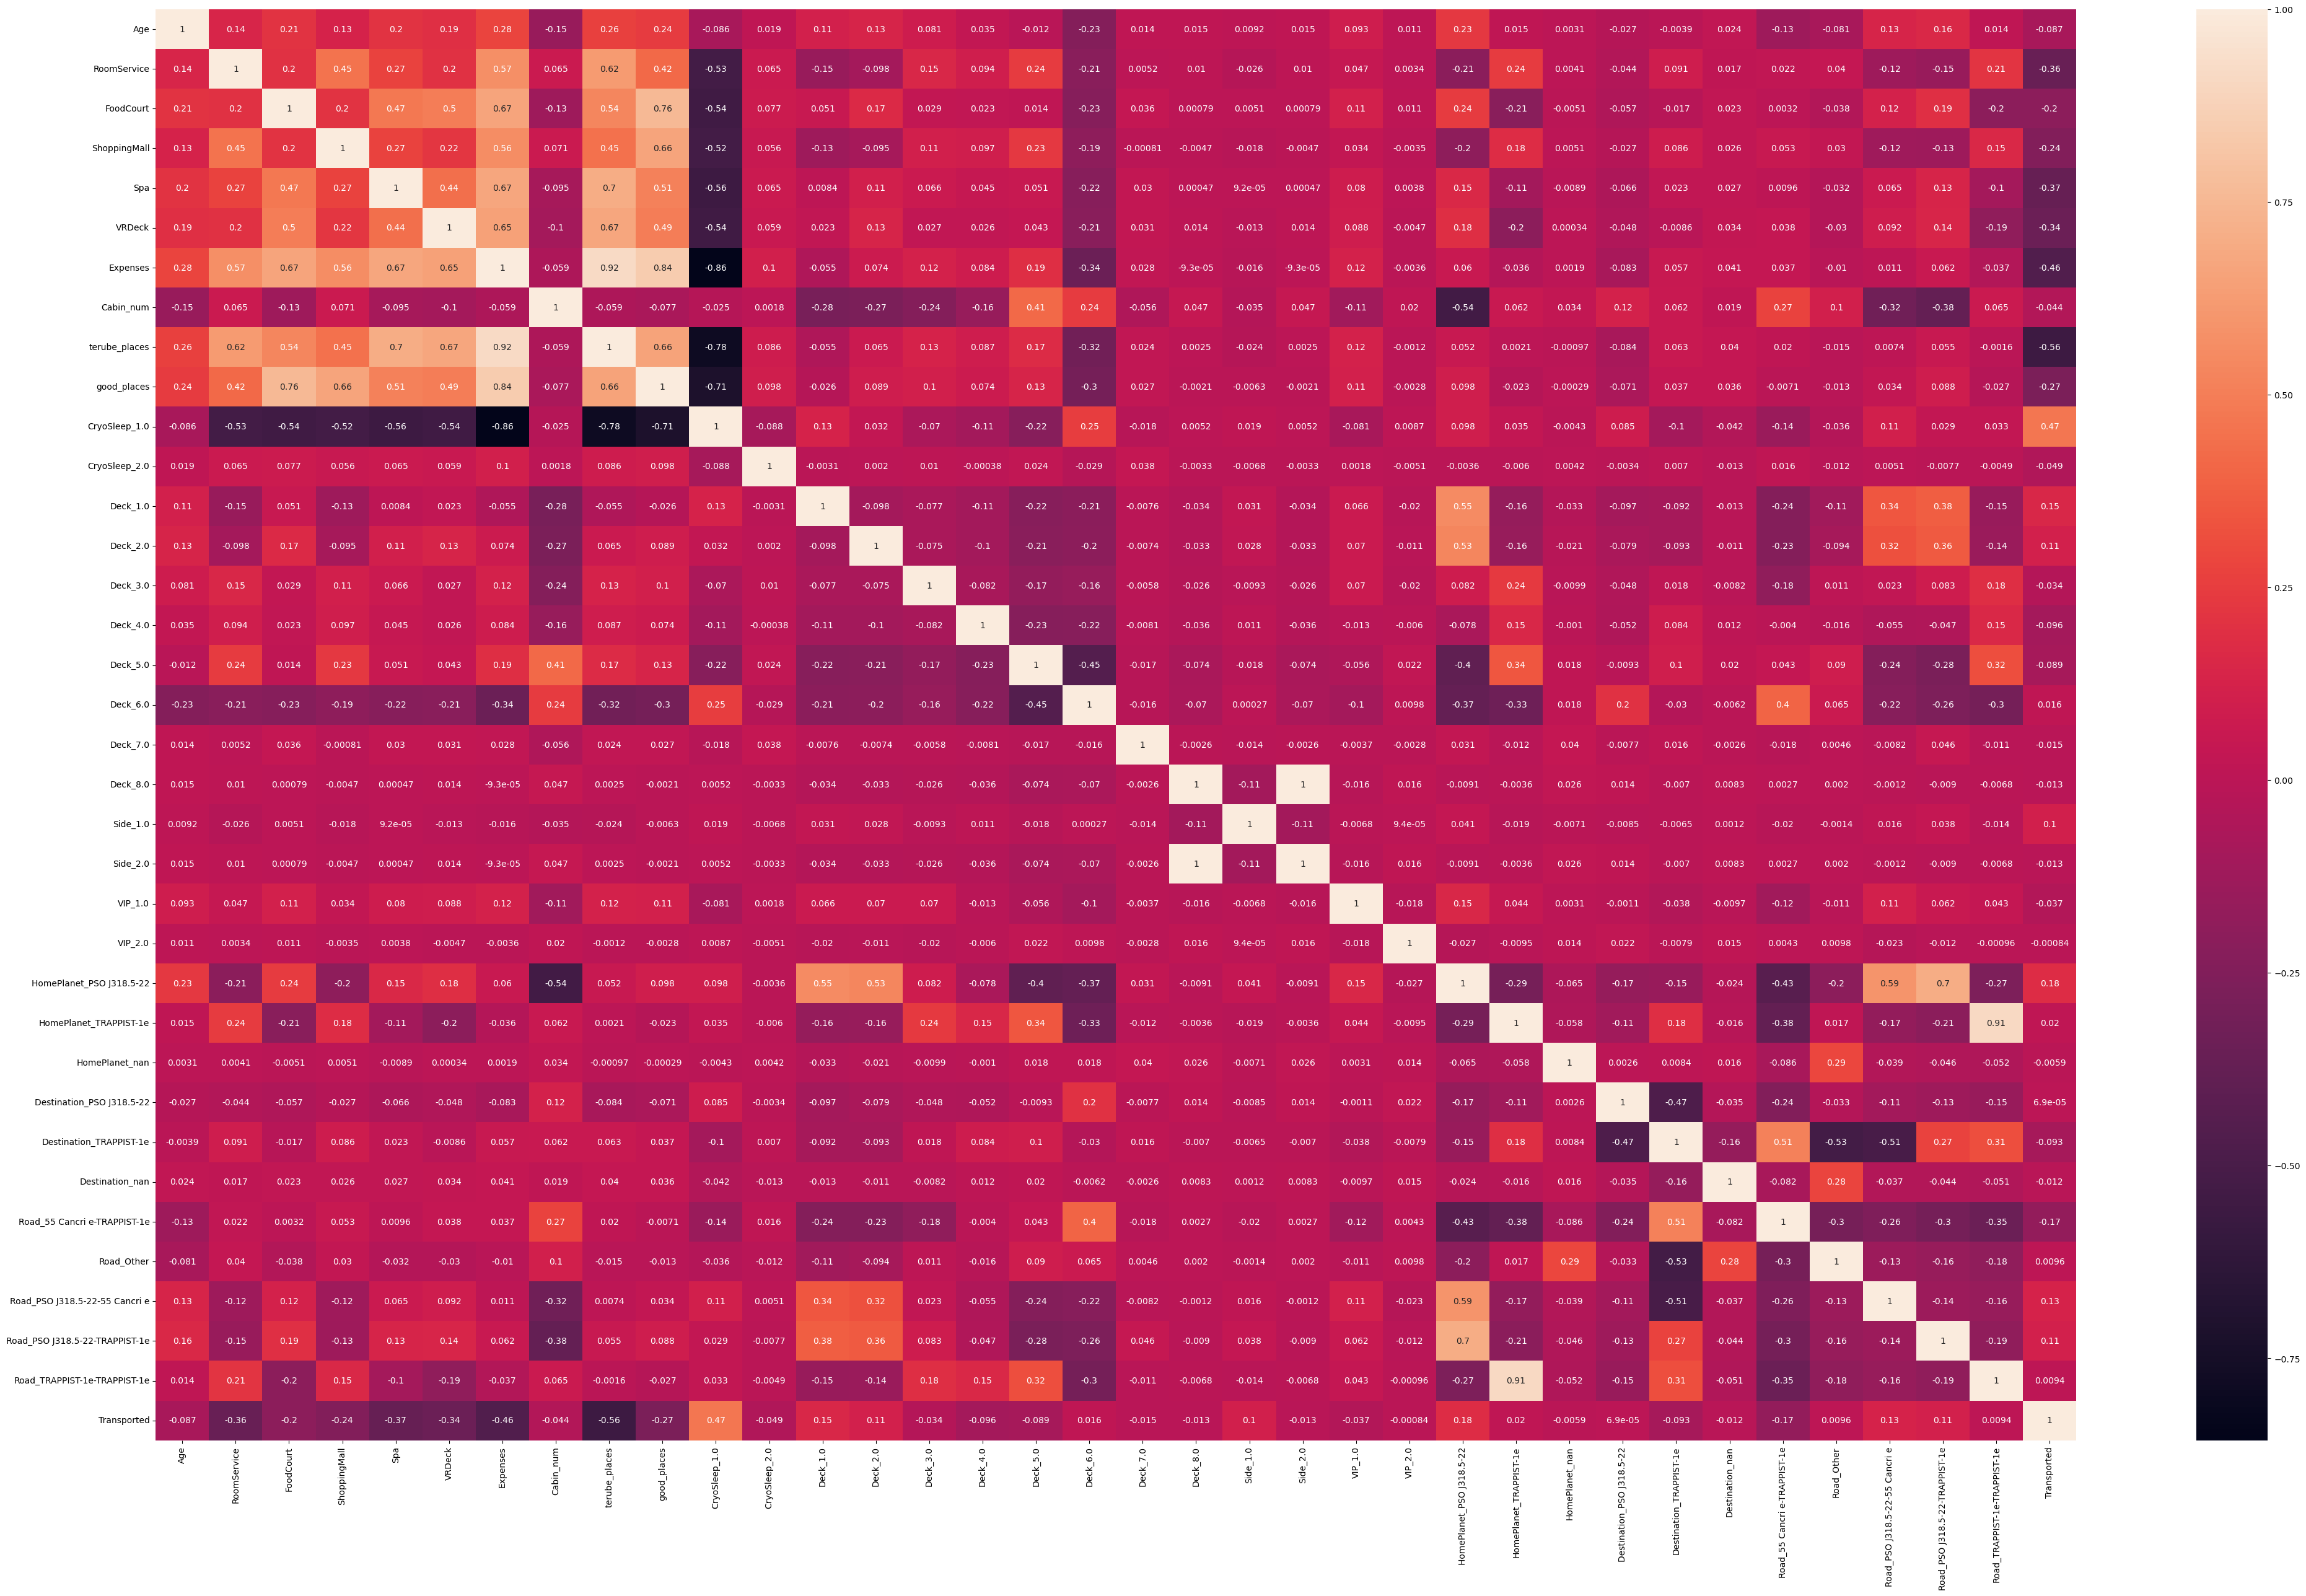

In [54]:
# observamos la correlación de las variables
t = Xtrain.copy()
t['Transported'] = Ytrain
plt.figure(figsize=(50,30))
sns.heatmap(t.corr(),annot=True)
plt.show()

# Modelization

In [55]:
# cross-validation con 5 splits and shuffle
kf = KFold(n_splits = 5, shuffle=True, random_state = 0)

In [56]:
models = []
models.append(('glm', LogisticRegression(random_state=99)))
models.append(('dectree', DecisionTreeClassifier(random_state=99)))
models.append(('rf', RandomForestClassifier(random_state=99)))
models.append(('gb', GradientBoostingClassifier(random_state=99)))
models.append(('xgb', XGBClassifier()))
models.append(('CatBoost',CatBoostClassifier(silent = True)))
models.append(('bag', BaggingClassifier(random_state=99)))
models.append(('svmr', SVC(random_state=99)))
models.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))

def boxplots_algorithms(results, names):

    plt.figure(figsize=(20,10))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


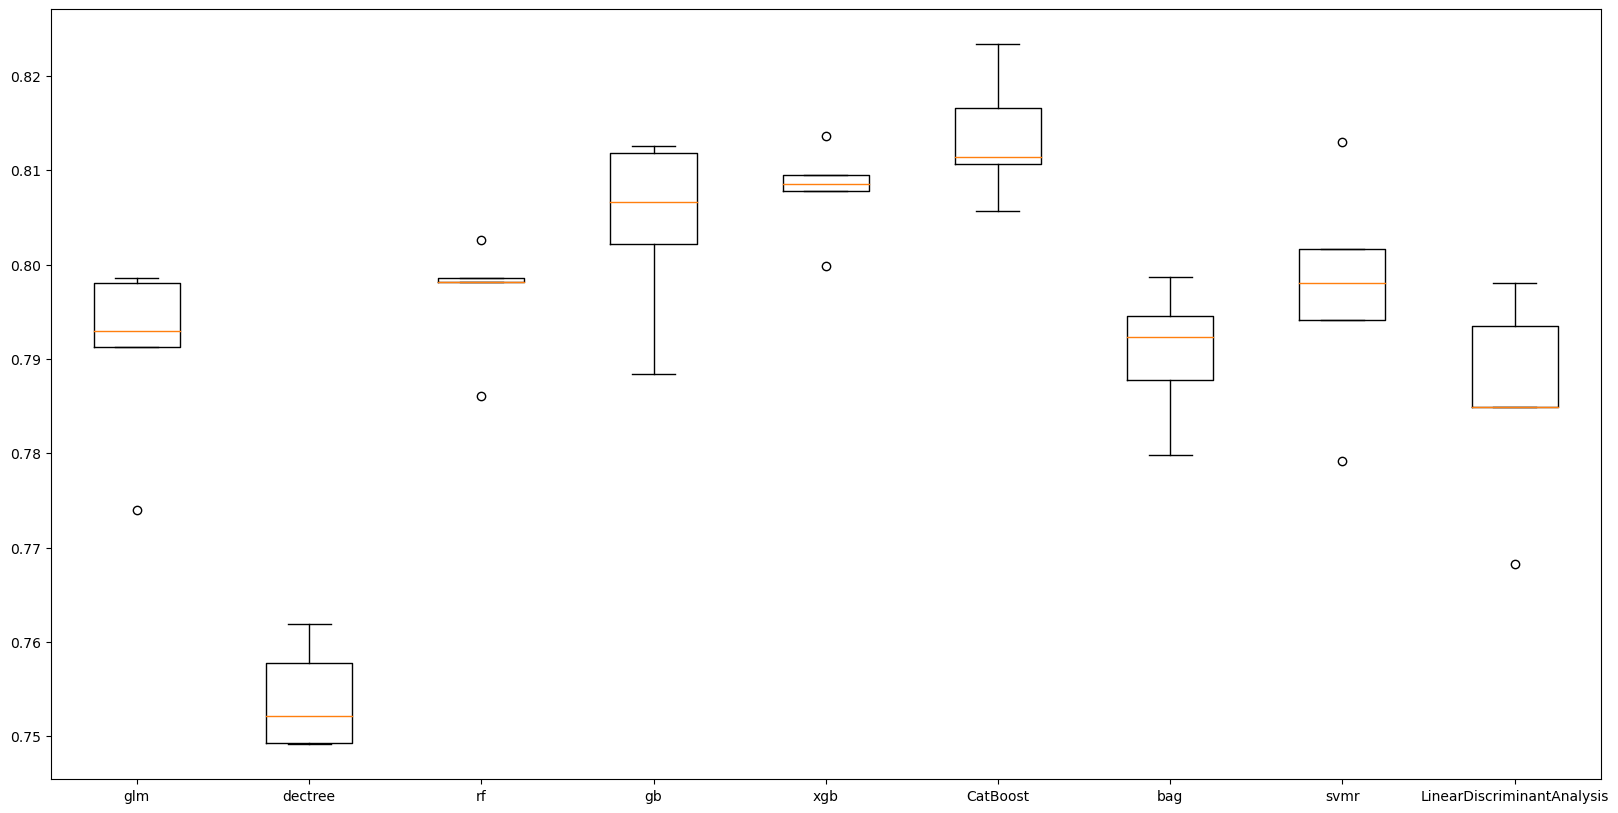

In [57]:
results = []
names = []

# YOUR CODE HERE
for name,model in models:
    acc = cross_val_score(model, Xtrain,Ytrain, cv = kf,scoring='accuracy')
    names.append(name)
    results.append(acc)

boxplots_algorithms(results, names)

## Variable Importance

In [58]:
rf = RandomForestClassifier(random_state=99)
xgb = XGBClassifier()
gb = GradientBoostingClassifier(random_state=99)
cat = CatBoostClassifier(silent = True)

In [59]:
rf.fit(Xtrain,Ytrain)
xgb.fit(Xtrain,Ytrain)
gb.fit(Xtrain,Ytrain)
cat.fit(Xtrain,Ytrain)

df = pd.DataFrame(zip(Xtrain.columns,rf.feature_importances_), columns = ['features','rf'] )
df2 = pd.DataFrame(zip(Xtrain.columns,xgb.feature_importances_), columns = ['features','xgb'] )
df3 = pd.DataFrame(zip(Xtrain.columns,gb.feature_importances_), columns = ['features','gb'])
df4 = pd.DataFrame(zip(Xtrain.columns,cat.feature_importances_), columns = ['features','cat'])
df = df.merge(df2, left_on= 'features', right_on='features')
df = df.merge(df3, left_on= 'features', right_on='features')
df = df.merge(df4, left_on= 'features', right_on='features')
df.sort_values(by = ['cat','xgb','gb','rf'], ascending= False)

features        rf       xgb        gb        cat
8                    terube_places  0.156940  0.106379  0.624403  21.057793
7                        Cabin_num  0.159248  0.011411  0.056750  11.615947
20                        Side_1.0  0.018768  0.025842  0.020783   6.056193
0                              Age  0.107998  0.008982  0.016131   5.521249
24        HomePlanet_PSO J318.5-22  0.012995  0.370624  0.054742   5.513807
6                         Expenses  0.083002  0.012539  0.007631   5.490306
9                      good_places  0.089863  0.024375  0.081772   4.841168
4                              Spa  0.048996  0.008242  0.003067   3.326901
13                        Deck_2.0  0.005299  0.018369  0.005249   3.218360
2                        FoodCourt  0.044101  0.009169  0.002169   3.135200
10                   CryoSleep_1.0  0.042778  0.017998  0.036906   3.117628
5                           VRDeck  0.050696  0.009426  0.002909   2.963401
15                        Deck_4.0  0.011408  0.072143  0.015063   2.796217
3                     ShoppingMall  0.034903  0.010200  0.001755   2.563187
1                      RoomService  0.042115  0.008098  0.002560   2.372608
16                        Deck_5.0  0.011010  0.014580  0.010768   2.324028
25          HomePlanet_TRAPPIST-1e  0.006021  0.081303  0.018061   2.168649
34    Road_TRAPPIST-1e-TRAPPIST-1e  0.004801  0.012182  0.003120   2.123669
32  Road_PSO J318.5-22-55 Cancri e  0.004640  0.007842  0.000029   1.988134
17                        Deck_6.0  0.013646  0.020320  0.013416   1.884540
12                        Deck_1.0  0.004236  0.010584  0.000438   1.480950
30    Road_55 Cancri e-TRAPPIST-1e  0.013900  0.014600  0.020276   1.476766
33  Road_PSO J318.5-22-TRAPPIST-1e  0.003866  0.028156  0.000000   0.660753
31                      Road_Other  0.004624  0.010374  0.000526   0.408697
28         Destination_TRAPPIST-1e  0.005985  0.007552  0.000928   0.379369
27       Destination_PSO J318.5-22  0.004493  0.008282  0.000190   0.369507
14                        Deck_3.0  0.002626  0.011549  0.000015   0.352419
23                         VIP_2.0  0.002973  0.008807  0.000000   0.264344
26                  HomePlanet_nan  0.001992  0.014519  0.000255   0.145127
29                 Destination_nan  0.001405  0.013165  0.000000   0.132822
11                   CryoSleep_2.0  0.001174  0.004850  0.000086   0.130192
22                         VIP_1.0  0.001530  0.011771  0.000000   0.068126
21                        Side_2.0  0.001015  0.000000  0.000000   0.033599
19                        Deck_8.0  0.000934  0.005766  0.000000   0.018252
18                        Deck_7.0  0.000019  0.000000  0.000000   0.000091

In [60]:
features = []
for feat in df.features:
    features.append(float(mean(df[ df['features'] == feat ].iloc[:,1:],axis=1) ) )
    #features[feat] = float(mean(df[ df['features'] == feat ].iloc[:,1:],axis=1) )
df = pd.DataFrame(zip(df.features,features) )
df.columns = ['features','mean']
df.sort_values('mean',ascending = False,inplace=True)

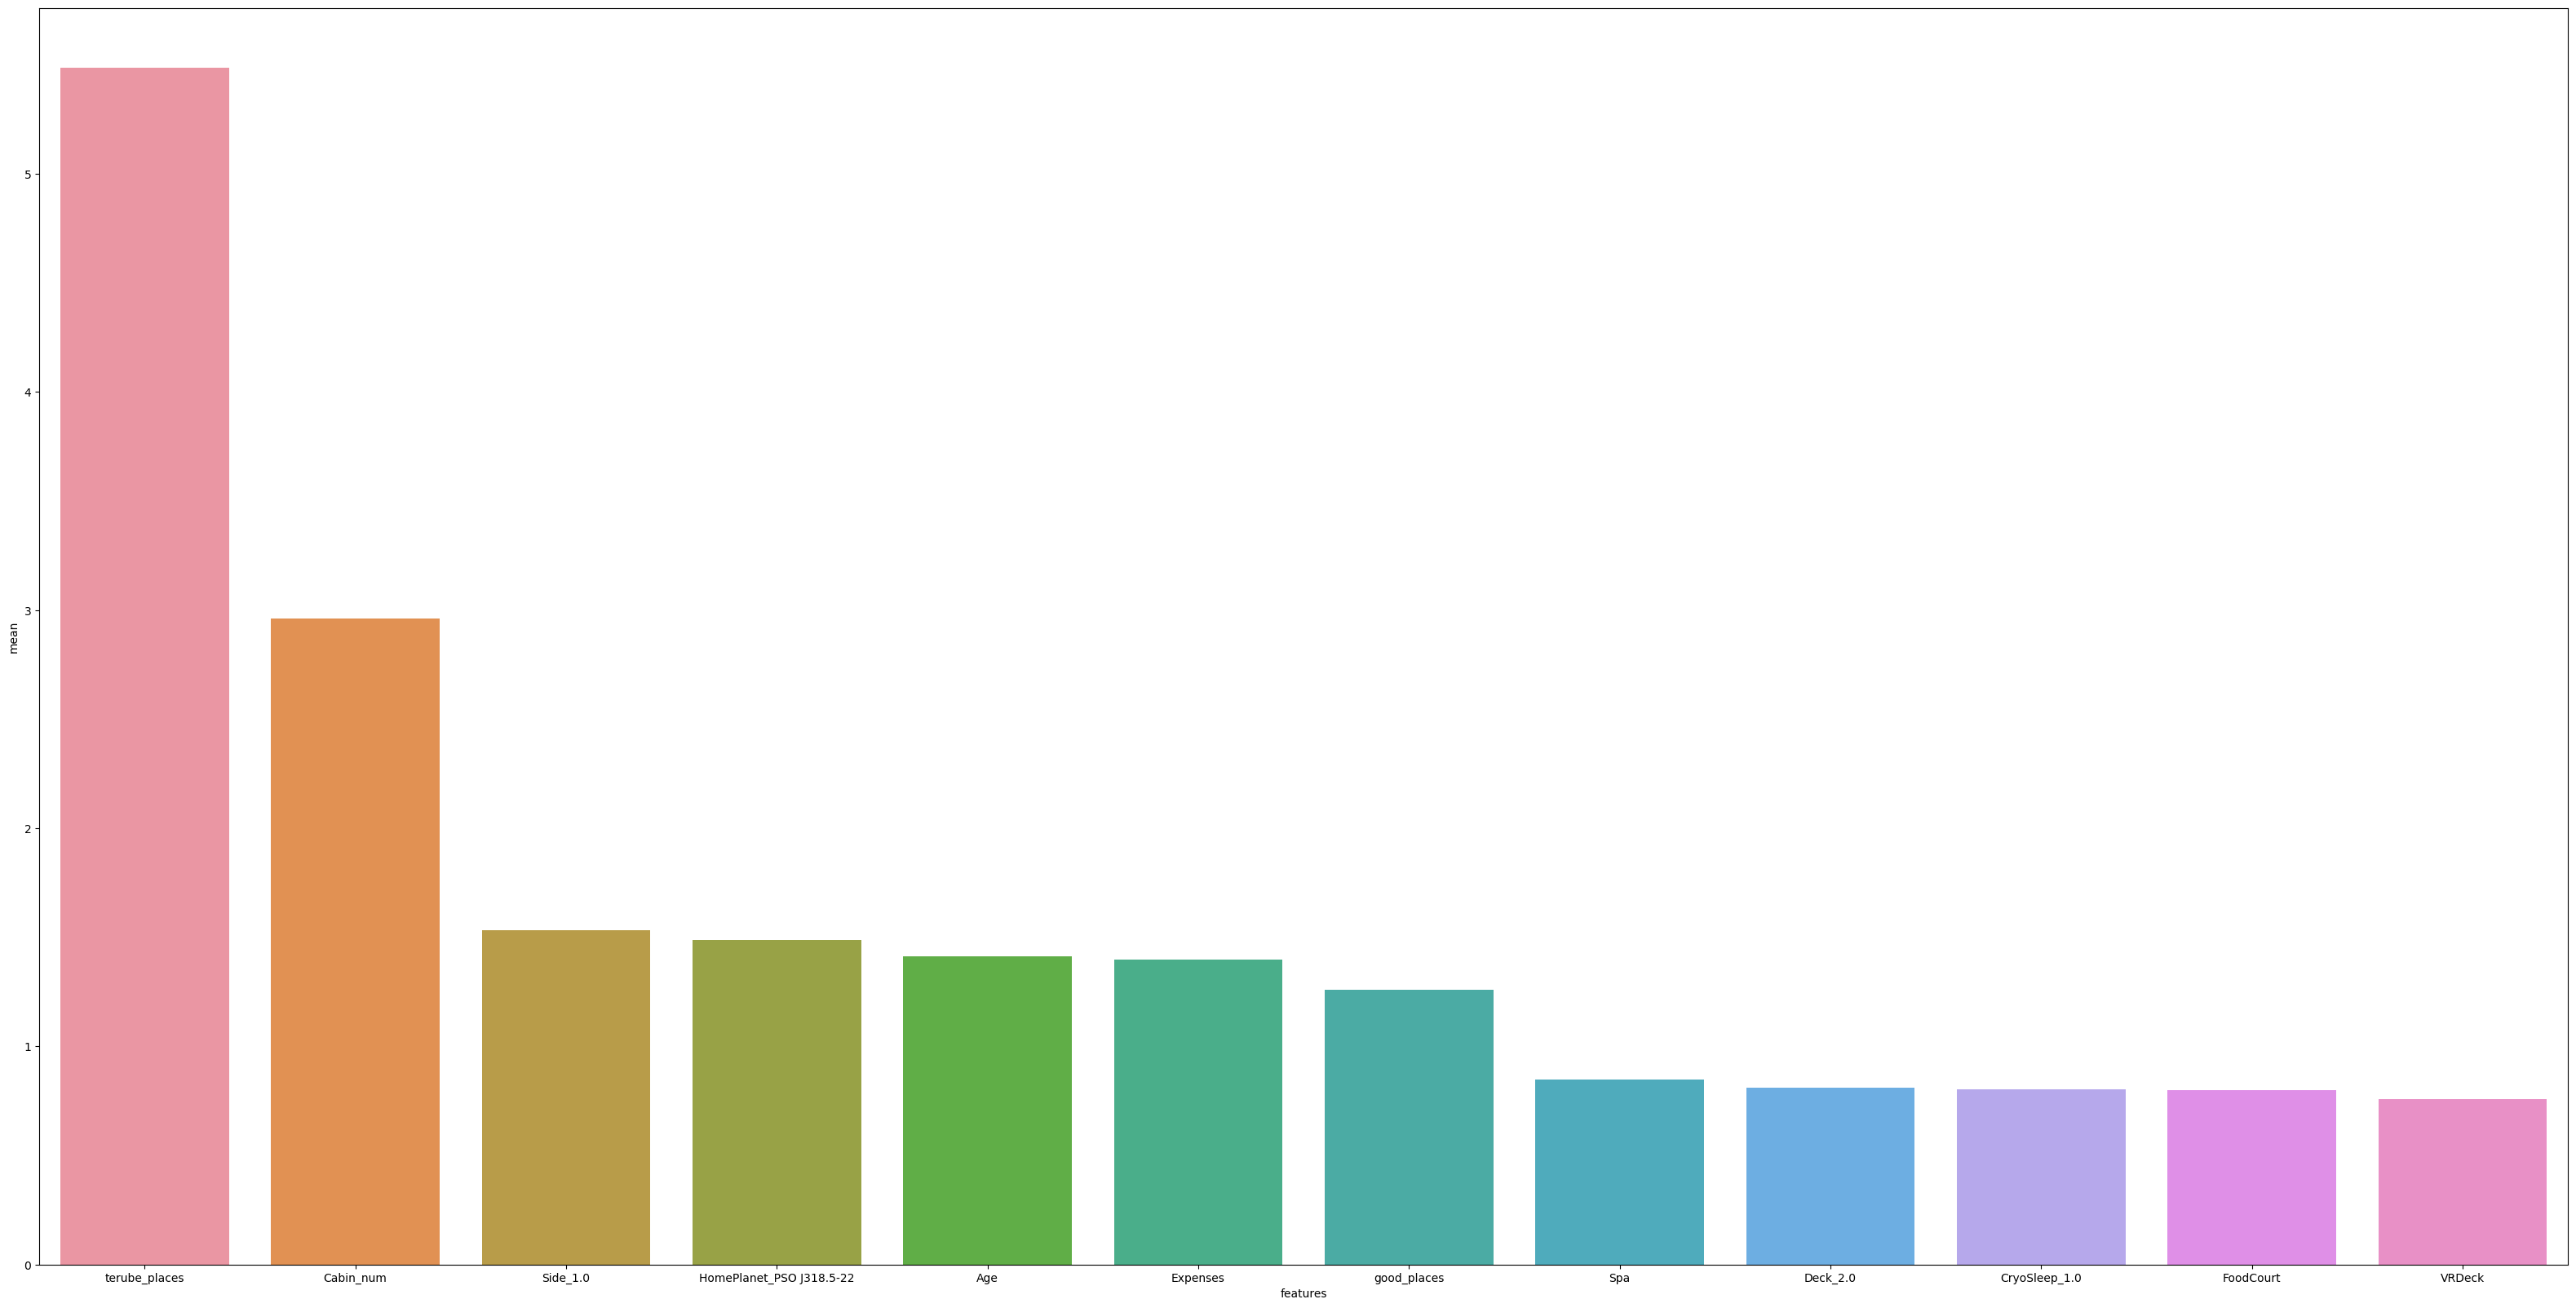

In [61]:
''' plot variable importance '''
plt.figure(figsize=(40,20))
# cogemos sólo las más relevantes para que se vea el gráfico
sns.barplot(data = df.iloc[:12,:], x = 'features', y = 'mean' )
plt.show()

## Parameter tunning

In [62]:
''' xgb tunning '''

parameters = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
grid_model = GridSearchCV(xgb, parameters, cv=kf, n_jobs=4).fit(Xtrain,Ytrain)
grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [63]:
xgb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1)
mean(cross_val_score(xgb,Xtrain,Ytrain,scoring = 'accuracy',cv = kf))

0.8129543518986019

## Clasification Report

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(Xtrain,Ytrain)

xgb.fit(xtrain,ytrain)
yxgb = xgb.predict(xtest)
gb.fit(xtrain,ytrain)
ygb = gb.predict(xtest)
cat.fit(xtrain,ytrain)
ycat = cat.predict(xtest)

In [65]:
print(f'classification report Gradient Boosting:')
print(classification_report(ytest, ygb))

classification report Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      1088
         1.0       0.78      0.79      0.79      1086

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



In [66]:
print(f'classification report XGBoost:')
print(classification_report(ytest, yxgb))

classification report XGBoost:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      1088
         1.0       0.81      0.78      0.79      1086

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [67]:
xgb.fit(Xtrain,Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [68]:
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = xgb.predict(Xtest)
sample_submission_df['Transported'] = sample_submission_df['Transported'].apply(lambda x: True if x == 1 else False)
sample_submission_df.to_csv('submission.csv', index=False)

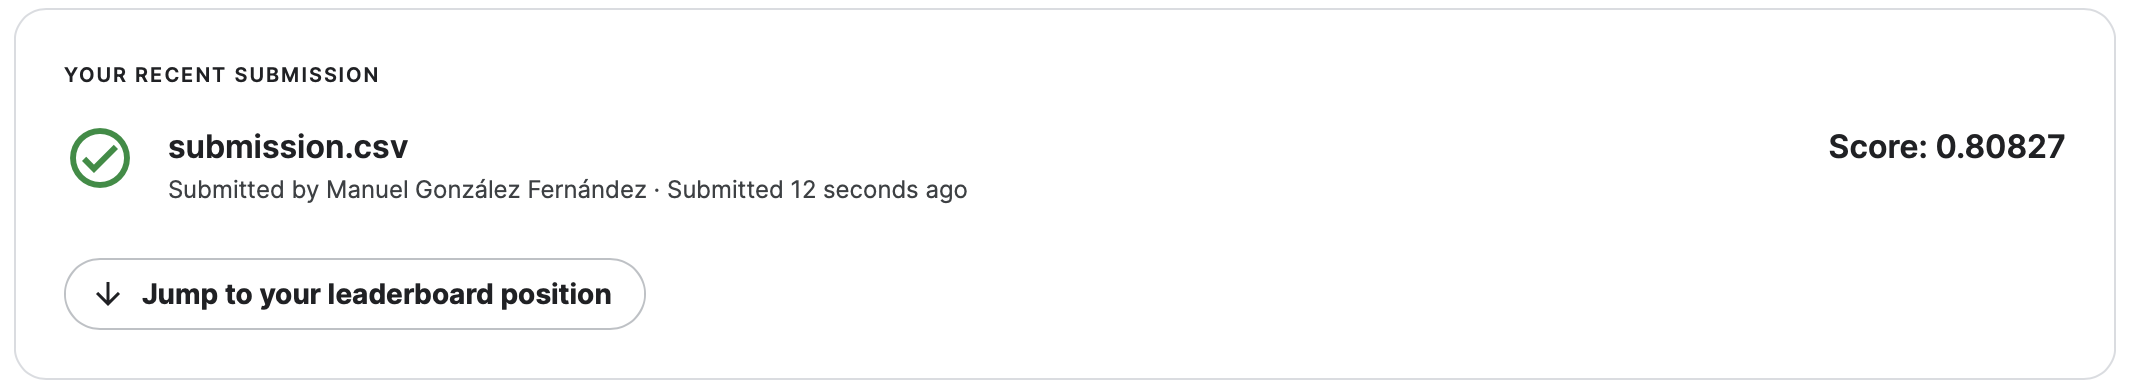